In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

from sklearn.ensemble import IsolationForest
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
import os
print(os.getcwd())


/Users/rishi/Desktop


In [3]:
import os
file_path = '/Users/rishi/Downloads/HomeC.csv'
if os.path.isfile(file_path):
    print(f"File found: {file_path}")
else:
    print(f"File not found: {file_path}")


File found: /Users/rishi/Downloads/HomeC.csv


In [4]:
home_df = pd.read_csv('/Users/rishi/Downloads/HomeC.csv')
home_df.head()

/var/folders/7k/25l48yc53f97nfpn136tj4pm0000gn/T/ipykernel_77646/3329269543.py:1: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  home_df = pd.read_csv('/Users/rishi/Downloads/HomeC.csv')


time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0  1451624400  0.932833  0.003483            0.932833         0.000033   
1  1451624401  0.934333  0.003467            0.934333         0.000000   
2  1451624402  0.931817  0.003467            0.931817         0.000017   
3  1451624403  1.022050  0.003483            1.022050         0.000017   
4  1451624404  1.139400  0.003467            1.139400         0.000133   

   Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0        0.020700        0.061917          0.442633     0.124150   
1        0.020717        0.063817          0.444067     0.124000   
2        0.020700        0.062317          0.446067     0.123533   
3        0.106900        0.068517          0.446583     0.123133   
4        0.236933        0.063983          0.446533     0.122850   

   Wine cellar [kW]  ...  visibility  summary  apparentTemperature  pressure  \
0          0.006983  ...        10.0    Clear                29.26   1016.91   
1          0.006983  ...        10.0    Clear                29.26   1016.91   
2          0.006983  ...        10.0    Clear                29.26   1016.91   
3          0.006983  ...        10.0    Clear                29.26   1016.91   
4          0.006850  ...        10.0    Clear                29.26   1016.91   

   windSpeed  cloudCover  windBearing  precipIntensity  dewPoint  \
0       9.18  cloudCover        282.0              0.0      24.4   
1       9.18  cloudCover        282.0              0.0      24.4   
2       9.18  cloudCover        282.0              0.0      24.4   
3       9.18  cloudCover        282.0              0.0      24.4   
4       9.18  cloudCover        282.0              0.0      24.4   

   precipProbability  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 32 columns]

In [5]:
home_df.tail(5)


time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
503906  1452128306  1.599333  0.003233            1.599333         0.000050   
503907  1452128307  1.924267  0.003217            1.924267         0.000033   
503908  1452128308  1.978200  0.003217            1.978200         0.000050   
503909  1452128309  1.990950  0.003233            1.990950         0.000050   
503910           \       NaN       NaN                 NaN              NaN   

        Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
503906        0.104017        0.625033          0.041750     0.005233   
503907        0.422383        0.637733          0.042033     0.004983   
503908        0.495667        0.620367          0.042100     0.005333   
503909        0.494700        0.634133          0.042100     0.004917   
503910             NaN             NaN               NaN          NaN   

        Wine cellar [kW]  ...  visibility     summary  apparentTemperature  \
503906          0.008433  ...        8.74  Light Rain                29.45   
503907          0.008467  ...        8.74  Light Rain                29.45   
503908          0.008233  ...        8.74  Light Rain                29.45   
503909          0.008133  ...        8.74  Light Rain                29.45   
503910               NaN  ...         NaN         NaN                  NaN   

        pressure  windSpeed  cloudCover  windBearing  precipIntensity  \
503906   1011.49       6.72        0.31        186.0           0.0101   
503907   1011.49       6.72        0.31        186.0           0.0101   
503908   1011.49       6.72        0.31        186.0           0.0101   
503909   1011.49       6.72        0.31        186.0           0.0101   
503910       NaN        NaN         NaN          NaN              NaN   

        dewPoint  precipProbability  
503906     31.27               0.51  
503907     31.27               0.51  
503908     31.27               0.51  
503909     31.27               0.51  
503910       NaN                NaN  

[5 rows x 32 columns]

In [6]:
#Removing the last row as it is invalid
home_df = home_df[0:-1]

In [7]:
home_df.tail(5)


time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
503905  1452128305  1.601233  0.003183            1.601233         0.000050   
503906  1452128306  1.599333  0.003233            1.599333         0.000050   
503907  1452128307  1.924267  0.003217            1.924267         0.000033   
503908  1452128308  1.978200  0.003217            1.978200         0.000050   
503909  1452128309  1.990950  0.003233            1.990950         0.000050   

        Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
503905        0.085267        0.642417          0.041783     0.005267   
503906        0.104017        0.625033          0.041750     0.005233   
503907        0.422383        0.637733          0.042033     0.004983   
503908        0.495667        0.620367          0.042100     0.005333   
503909        0.494700        0.634133          0.042100     0.004917   

        Wine cellar [kW]  ...  visibility     summary  apparentTemperature  \
503905          0.008667  ...        8.74  Light Rain                29.45   
503906          0.008433  ...        8.74  Light Rain                29.45   
503907          0.008467  ...        8.74  Light Rain                29.45   
503908          0.008233  ...        8.74  Light Rain                29.45   
503909          0.008133  ...        8.74  Light Rain                29.45   

        pressure  windSpeed  cloudCover  windBearing  precipIntensity  \
503905   1011.49       6.72        0.31        186.0           0.0101   
503906   1011.49       6.72        0.31        186.0           0.0101   
503907   1011.49       6.72        0.31        186.0           0.0101   
503908   1011.49       6.72        0.31        186.0           0.0101   
503909   1011.49       6.72        0.31        186.0           0.0101   

        dewPoint  precipProbability  
503905     31.27               0.51  
503906     31.27               0.51  
503907     31.27               0.51  
503908     31.27               0.51  
503909     31.27               0.51  

[5 rows x 32 columns]

In [8]:
#Removing [kW] from column names
home_df.columns = [col.replace(' [kW]', '') for col in home_df.columns]
home_df.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

In [9]:
home_df.head()


time       use       gen  House overall  Dishwasher  Furnace 1  \
0  1451624400  0.932833  0.003483       0.932833    0.000033   0.020700   
1  1451624401  0.934333  0.003467       0.934333    0.000000   0.020717   
2  1451624402  0.931817  0.003467       0.931817    0.000017   0.020700   
3  1451624403  1.022050  0.003483       1.022050    0.000017   0.106900   
4  1451624404  1.139400  0.003467       1.139400    0.000133   0.236933   

   Furnace 2  Home office    Fridge  Wine cellar  ...  visibility  summary  \
0   0.061917     0.442633  0.124150     0.006983  ...        10.0    Clear   
1   0.063817     0.444067  0.124000     0.006983  ...        10.0    Clear   
2   0.062317     0.446067  0.123533     0.006983  ...        10.0    Clear   
3   0.068517     0.446583  0.123133     0.006983  ...        10.0    Clear   
4   0.063983     0.446533  0.122850     0.006850  ...        10.0    Clear   

   apparentTemperature  pressure  windSpeed  cloudCover  windBearing  \
0                29.26   1016.91       9.18  cloudCover        282.0   
1                29.26   1016.91       9.18  cloudCover        282.0   
2                29.26   1016.91       9.18  cloudCover        282.0   
3                29.26   1016.91       9.18  cloudCover        282.0   
4                29.26   1016.91       9.18  cloudCover        282.0   

   precipIntensity  dewPoint  precipProbability  
0              0.0      24.4                0.0  
1              0.0      24.4                0.0  
2              0.0      24.4                0.0  
3              0.0      24.4                0.0  
4              0.0      24.4                0.0  

[5 rows x 32 columns]

#### The dataset contains several columns representing similar room types. For instance, we might see columns labeled 'Furnace 1' and 'Furnace 2'. To streamline the data, we can combine these related columns by summing their values. This approach reduces the overall number of columns while preserving the total information. For example, if 'Furnace 1' has a value of 100 and 'Furnace 2' has a value of 150, we could create a single 'Furnace' column with a value of 250, thus simplifying our dataset structure.

In [11]:
#Summing the columns 'Furnace 1' and 'Furnace 2' since we only need the total energy usage by both the furnaces
home_df['Furnace'] = home_df[['Furnace 1','Furnace 2']].sum(axis=1)

In [12]:
#Finding the average usage of all kitchens('Kitchen 12','Kitchen 14','Kitchen 38')
home_df['Kitchen'] = home_df[['Kitchen 12','Kitchen 14','Kitchen 38']].mean(axis=1)

In [13]:

#Dropping old columns on which the aggregation have been done
home_df = home_df.drop(['Furnace 1','Furnace 2','Kitchen 12','Kitchen 14','Kitchen 38'], axis=1)

In [14]:
home_df.head()


time       use       gen  House overall  Dishwasher  Home office  \
0  1451624400  0.932833  0.003483       0.932833    0.000033     0.442633   
1  1451624401  0.934333  0.003467       0.934333    0.000000     0.444067   
2  1451624402  0.931817  0.003467       0.931817    0.000017     0.446067   
3  1451624403  1.022050  0.003483       1.022050    0.000017     0.446583   
4  1451624404  1.139400  0.003467       1.139400    0.000133     0.446533   

     Fridge  Wine cellar  Garage door      Barn  ...  apparentTemperature  \
0  0.124150     0.006983     0.013083  0.031350  ...                29.26   
1  0.124000     0.006983     0.013117  0.031500  ...                29.26   
2  0.123533     0.006983     0.013083  0.031517  ...                29.26   
3  0.123133     0.006983     0.013000  0.031500  ...                29.26   
4  0.122850     0.006850     0.012783  0.031500  ...                29.26   

   pressure  windSpeed  cloudCover  windBearing precipIntensity  dewPoint  \
0   1016.91       9.18  cloudCover        282.0             0.0      24.4   
1   1016.91       9.18  cloudCover        282.0             0.0      24.4   
2   1016.91       9.18  cloudCover        282.0             0.0      24.4   
3   1016.91       9.18  cloudCover        282.0             0.0      24.4   
4   1016.91       9.18  cloudCover        282.0             0.0      24.4   

   precipProbability   Furnace   Kitchen  
0                0.0  0.082617  0.000189  
1                0.0  0.084533  0.000189  
2                0.0  0.083017  0.000206  
3                0.0  0.175417  0.000217  
4                0.0  0.300917  0.000261  

[5 rows x 29 columns]

## Our dataset includes a 'time' column that uses Unix timestamp format. To make this information more readable and useful, we should transform these timestamps into standard date and time formats.

In [16]:
print(' start ' , time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(home_df['time'].iloc[0]))))


 start  2016-01-01 10:30:00


In [17]:
#Converting the unix timestamp values in the column 'time' to a readable date format
#Setting freq= 'min' since readings are being taken in a time span of one min
time_index = pd.date_range('2016-01-01 05:00', periods=len(home_df),  freq='min')  
time_index = pd.DatetimeIndex(time_index)
home_df = home_df.set_index(time_index)
home_df = home_df.drop(['time'], axis=1)
home_df.iloc[np.r_[0:5,-5:0]].iloc[:,0]


2016-01-01 05:00:00    0.932833
2016-01-01 05:01:00    0.934333
2016-01-01 05:02:00    0.931817
2016-01-01 05:03:00    1.022050
2016-01-01 05:04:00    1.139400
2016-12-16 03:25:00    1.601233
2016-12-16 03:26:00    1.599333
2016-12-16 03:27:00    1.924267
2016-12-16 03:28:00    1.978200
2016-12-16 03:29:00    1.990950
Name: use, dtype: float64

## Examine the data type of each column.

In [19]:
#Display dataframe info
home_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503910 entries, 2016-01-01 05:00:00 to 2016-12-16 03:29:00
Freq: min
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   use                  503910 non-null  float64
 1   gen                  503910 non-null  float64
 2   House overall        503910 non-null  float64
 3   Dishwasher           503910 non-null  float64
 4   Home office          503910 non-null  float64
 5   Fridge               503910 non-null  float64
 6   Wine cellar          503910 non-null  float64
 7   Garage door          503910 non-null  float64
 8   Barn                 503910 non-null  float64
 9   Well                 503910 non-null  float64
 10  Microwave            503910 non-null  float64
 11  Living room          503910 non-null  float64
 12  Solar                503910 non-null  float64
 13  temperature          503910 non-null  float64
 14  icon                 503

In [20]:
#Drop columns 'icon' and 'summary' as their data type is 'object'
home_df = home_df.drop(['icon', 'summary'], axis=1)

In [21]:
#Examining the unique values of the attribute 'cloudCover' to see if there is any invalid data that needs to be handled
home_df['cloudCover'].unique()

array(['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19',
       '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17',
       '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06',
       '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39',
       '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24',
       '0.57', 0.24, 1.0, 0.31, 0.28, 0.15, 0.41, 0.1, 0.12, 0.08, 0.09,
       0.19, 0.04, 0.05, 0.29, 0.27, 0.35, 0.18, 0.06, 0.03, 0.11, 0.14,
       0.25, 0.78, 0.0, 0.16, 0.21, 0.23, 0.17, 0.75, 0.26, 0.2, 0.76,
       0.13, 0.77, 0.46, 0.07, 0.55, 0.02, 0.01, 0.51, 0.47, 0.5, 0.4,
       0.3, 0.22, 0.43, 0.33, 0.6, 0.68, 0.66, 0.45, 0.34, 0.52, 0.67,
       0.48, 0.49, 0.39, 0.37, 0.62, 0.36, 0.79, 0.61, 0.38, 0.42, 0.53,
       0.63, 0.44, 0.54, 0.32, 0.56, 0.58, 0.72, 0.57, 0.73, 0.71, 0.64,
       0.59], dtype=object)

In [22]:
#We see that for some rows we have an invalid value for cloudCover.
home_df[home_df['cloudCover'] == 'cloudCover'].shape

(58, 26)

In [28]:
#We replace these missing values with the next valid observation we have
import pandas as pd

# Replace missing values in 'cloudCover' column with forward fill
home_df['cloudCover'].fillna(method='bfill', inplace=True)

# Convert 'cloudCover' to float
home_df['cloudCover'] = home_df['cloudCover'].astype('float')
home_df['cloudCover'] = home_df['cloudCover'].astype(float)
print(home_df['cloudCover'].head())




/var/folders/7k/25l48yc53f97nfpn136tj4pm0000gn/T/ipykernel_77646/2576142437.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  home_df['cloudCover'].fillna(method='bfill', inplace=True)


ValueError: could not convert string to float: 'cloudCover'

In [30]:
#It seems use and House overall show the same data
home_df[['use', 'House overall']].head()

use  House overall
2016-01-01 05:00:00  0.932833       0.932833
2016-01-01 05:01:00  0.934333       0.934333
2016-01-01 05:02:00  0.931817       0.931817
2016-01-01 05:03:00  1.022050       1.022050
2016-01-01 05:04:00  1.139400       1.139400

<Axes: >

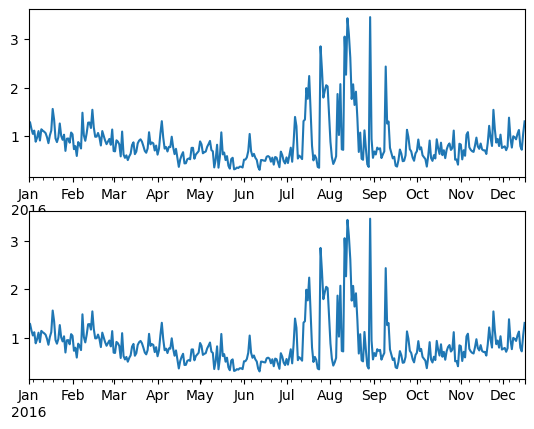

In [32]:
# Let's visualize these use and House overall to confirm they show the same data so that we could remove one of the columns
fig, axes = plt.subplots(nrows=2, ncols=1)
home_df['use'].resample('D').mean().plot(ax=axes[0])
home_df['House overall'].resample('D').mean().plot(ax=axes[1])
     

In [34]:
#Since the above plot confirms both the columns indicate the same data lets go ahead and remove 'House overall'
home_df = home_df.drop(columns=['House overall'])
home_df.shape

(503910, 25)

<Axes: >

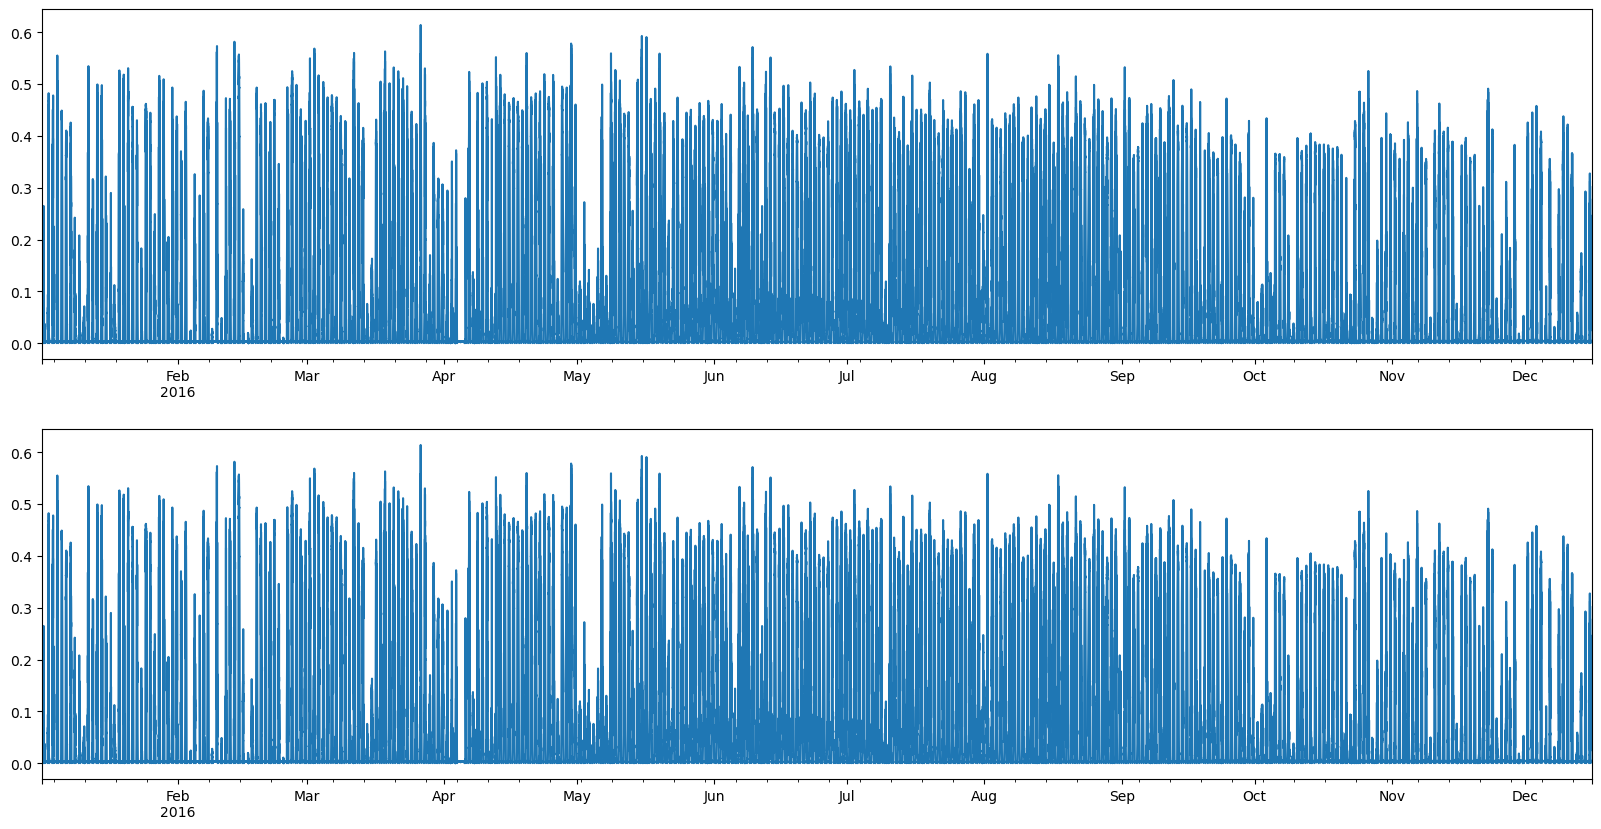

In [36]:
#Similarly, the attributes 'gen' and 'Solar' show the same data. Let's visualize these two columns to confirm the same
fig, axes = plt.subplots(nrows=2, ncols=1)
home_df['gen'].plot(ax=axes[0],figsize=(20,10))
home_df['Solar'].plot(ax=axes[1],figsize=(20,10))

In [38]:
#Dropping the column 'Solar' since it shows the same data as 'gen'
home_df = home_df.drop(columns=['Solar'])
home_df.shape

(503910, 24)

# Data Transformation

In [40]:
#Creating two separate dataframe objects with energy and weather data respectively.
energy_data = home_df.filter(items=[ 'gen', 'use', 'Dishwasher',
                                     'Furnace', 'Home office', 'Fridge',
                                     'Wine cellar', 'Garage door', 'Kitchen', 'Barn', 'Well',
                                     'Microwave', 'Living room'])

weather_data = home_df.filter(items=['temperature',
                                      'humidity', 'visibility', 'apparentTemperature', 'pressure',
                                      'windSpeed', 'windBearing', 'dewPoint'])
     

In [42]:
energy_data.head()


gen       use  Dishwasher   Furnace  Home office  \
2016-01-01 05:00:00  0.003483  0.932833    0.000033  0.082617     0.442633   
2016-01-01 05:01:00  0.003467  0.934333    0.000000  0.084533     0.444067   
2016-01-01 05:02:00  0.003467  0.931817    0.000017  0.083017     0.446067   
2016-01-01 05:03:00  0.003483  1.022050    0.000017  0.175417     0.446583   
2016-01-01 05:04:00  0.003467  1.139400    0.000133  0.300917     0.446533   

                       Fridge  Wine cellar  Garage door   Kitchen      Barn  \
2016-01-01 05:00:00  0.124150     0.006983     0.013083  0.000189  0.031350   
2016-01-01 05:01:00  0.124000     0.006983     0.013117  0.000189  0.031500   
2016-01-01 05:02:00  0.123533     0.006983     0.013083  0.000206  0.031517   
2016-01-01 05:03:00  0.123133     0.006983     0.013000  0.000217  0.031500   
2016-01-01 05:04:00  0.122850     0.006850     0.012783  0.000261  0.031500   

                         Well  Microwave  Living room  
2016-01-01 05:00:00  0.001017   0.004067     0.001517  
2016-01-01 05:01:00  0.001017   0.004067     0.001650  
2016-01-01 05:02:00  0.001000   0.004067     0.001650  
2016-01-01 05:03:00  0.001017   0.004067     0.001617  
2016-01-01 05:04:00  0.001017   0.004067     0.001583

In [44]:
weather_data.head()


temperature  humidity  visibility  apparentTemperature  \
2016-01-01 05:00:00        36.14      0.62        10.0                29.26   
2016-01-01 05:01:00        36.14      0.62        10.0                29.26   
2016-01-01 05:02:00        36.14      0.62        10.0                29.26   
2016-01-01 05:03:00        36.14      0.62        10.0                29.26   
2016-01-01 05:04:00        36.14      0.62        10.0                29.26   

                     pressure  windSpeed  windBearing  dewPoint  
2016-01-01 05:00:00   1016.91       9.18        282.0      24.4  
2016-01-01 05:01:00   1016.91       9.18        282.0      24.4  
2016-01-01 05:02:00   1016.91       9.18        282.0      24.4  
2016-01-01 05:03:00   1016.91       9.18        282.0      24.4  
2016-01-01 05:04:00   1016.91       9.18        282.0      24.4

In [46]:
#Generating the data per day
energy_per_day = energy_data.resample('D').sum()
energy_per_day.head()

gen          use  Dishwasher     Furnace  Home office  \
2016-01-01   18.026200  1366.269517   59.517171  492.020017    64.668783   
2016-01-02   76.051300  1851.521067   63.154404  683.761967   145.570317   
2016-01-03   74.081433  1651.128133  105.508668  613.630533   196.064167   
2016-01-04  108.525017  1500.686017   58.880760  605.129767   180.650867   
2016-01-05  148.107500  1597.968867   72.973254  817.065250   133.360867   

               Fridge  Wine cellar  Garage door   Kitchen        Barn  \
2016-01-01  94.740300    29.093367    15.228367  3.873278   99.622950   
2016-01-02  74.851733    24.096767    19.246333  5.154752  185.776967   
2016-01-03  92.149033    32.989533    19.444933  6.364001  146.493667   
2016-01-04  71.016683    20.980700    19.249983  5.782085   47.837017   
2016-01-05  80.135633    30.792300    19.773067  4.918163   50.166067   

                 Well  Microwave  Living room  
2016-01-01  30.537233  12.961117    77.071667  
2016-01-02  33.688133  12.480300    71.142950  
2016-01-03  31.955233  19.066117    42.779250  
2016-01-04  43.438883  20.249933    93.077467  
2016-01-05  19.157417  16.658967    44.483650

In [48]:
#Generating the data per week
energy_per_week = energy_data.resample('W').sum()
energy_per_week.head()

gen           use  Dishwasher      Furnace  Home office  \
2016-01-03  168.158933   4868.918717  228.180243  1789.412517   406.303267   
2016-01-10  572.221083  10281.065683  322.905918  4309.503517  1060.328917   
2016-01-17  446.667833  10365.530000  415.871596  4661.908917  1036.034600   
2016-01-24  773.163450  11446.274100  328.069396  5650.391533   845.905650   
2016-01-31  636.354167   9294.364817  318.545145  3861.230900   695.367683   

                Fridge  Wine cellar  Garage door    Kitchen        Barn  \
2016-01-03  261.741067    86.179667    53.919633  15.392031  431.893583   
2016-01-10  595.732950   180.574800   139.934433  34.102771  691.477933   
2016-01-17  538.311483   201.654983   138.471933  34.200943  467.751483   
2016-01-24  501.469017   177.311500   136.808333  35.232993  871.137733   
2016-01-31  539.017367   195.041583   135.907333  35.082345  851.749650   

                  Well   Microwave  Living room  
2016-01-03   96.180600   44.507533   190.993867  
2016-01-10  161.061051  104.610683   475.712567  
2016-01-17  165.124600   90.808833   446.148850  
2016-01-24  173.225900   88.269900   431.383199  
2016-01-31  170.518450  101.335400   376.918150

In [50]:
#Generating the data per month
energy_per_month = energy_data.resample('ME').sum() 
energy_per_month.head()

gen           use   Dishwasher       Furnace  Home office  \
2016-01-31  2596.565467  46256.153317  1613.572299  20272.447383  4043.940117   
2016-02-29  2704.221700  41558.035267  1399.090831  19171.333067  2850.642583   
2016-03-31  3795.807367  34026.880883  1506.501997  13046.526433  3511.736400   
2016-04-30  3893.534950  29662.845900  1443.403725   9393.876000  3173.250717   
2016-05-31  3670.712050  25550.843150  1180.812253   5957.877471  2768.990462   

                 Fridge  Wine cellar  Garage door     Kitchen         Barn  \
2016-01-31  2436.271883   840.762533   605.041667  154.011083  3314.010383   
2016-02-29  2225.080050   832.488483   572.159733  137.273728  2817.221550   
2016-03-31  2393.101050  1268.479517   614.368167  134.469697  1791.915983   
2016-04-30  2454.983017  1548.467600   627.425083  103.812260  2626.763767   
2016-05-31  2648.659933  1561.469854   617.532683   99.109124  3321.740146   

                  Well   Microwave  Living room  
2016-01-31  766.110601  429.532350  1921.156633  
2016-02-29  741.079083  388.025434  1408.870900  
2016-03-31  731.827333  426.910884  1585.980033  
2016-04-30  658.356017  488.510350  1571.712033  
2016-05-31  450.940233  406.917284  1179.055583

# Data Visualization

<Axes: title={'center': 'Overall energy consumption in kW per day'}>

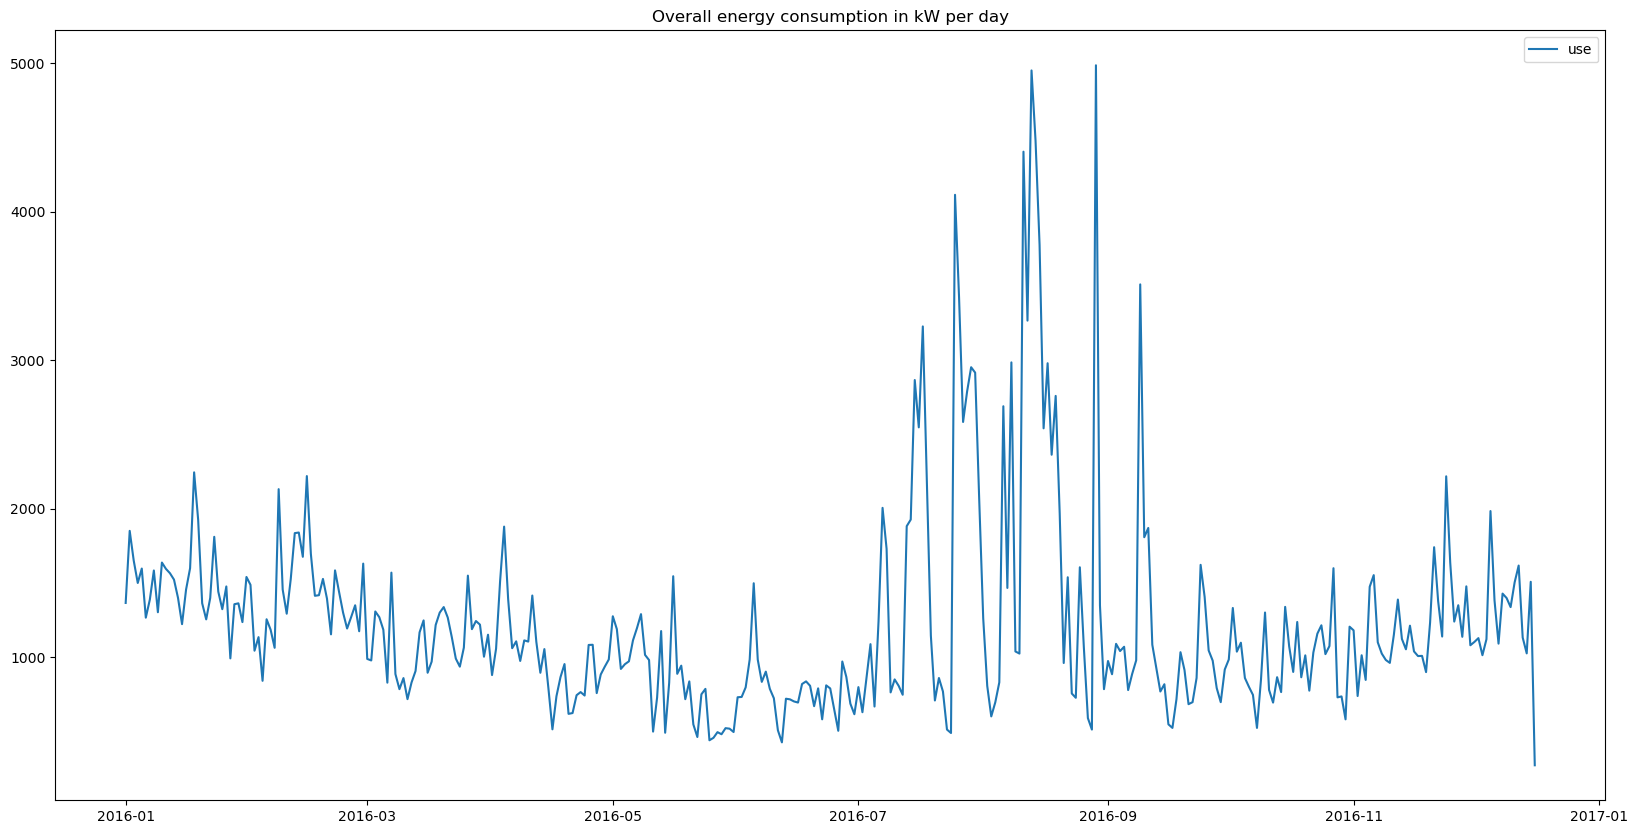

In [52]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Overall energy consumption in kW per day")
#Plotting the energy consumption per day
sns.lineplot(data = energy_per_day.filter(items=['use']), dashes=False)

<Axes: title={'center': 'Overall energy consumption in kW per week'}>

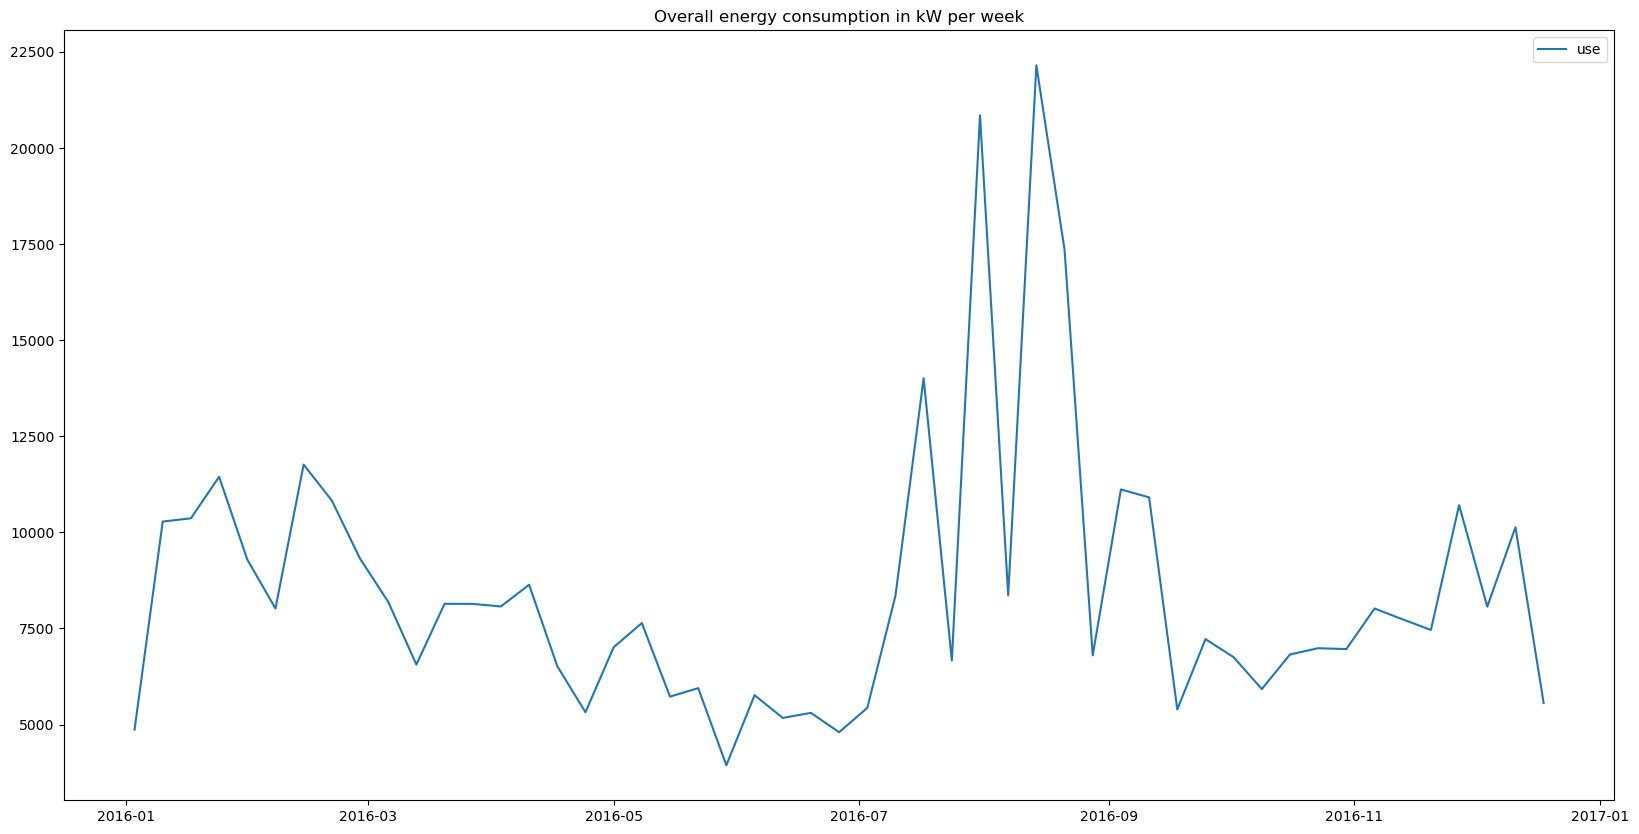

In [54]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Overall energy consumption in kW per week")
#Plotting the energy consumption per week
sns.lineplot(data = energy_per_week.filter(items=['use']), dashes=False)

<Axes: title={'center': 'Overall energy consumption in kW per month'}>

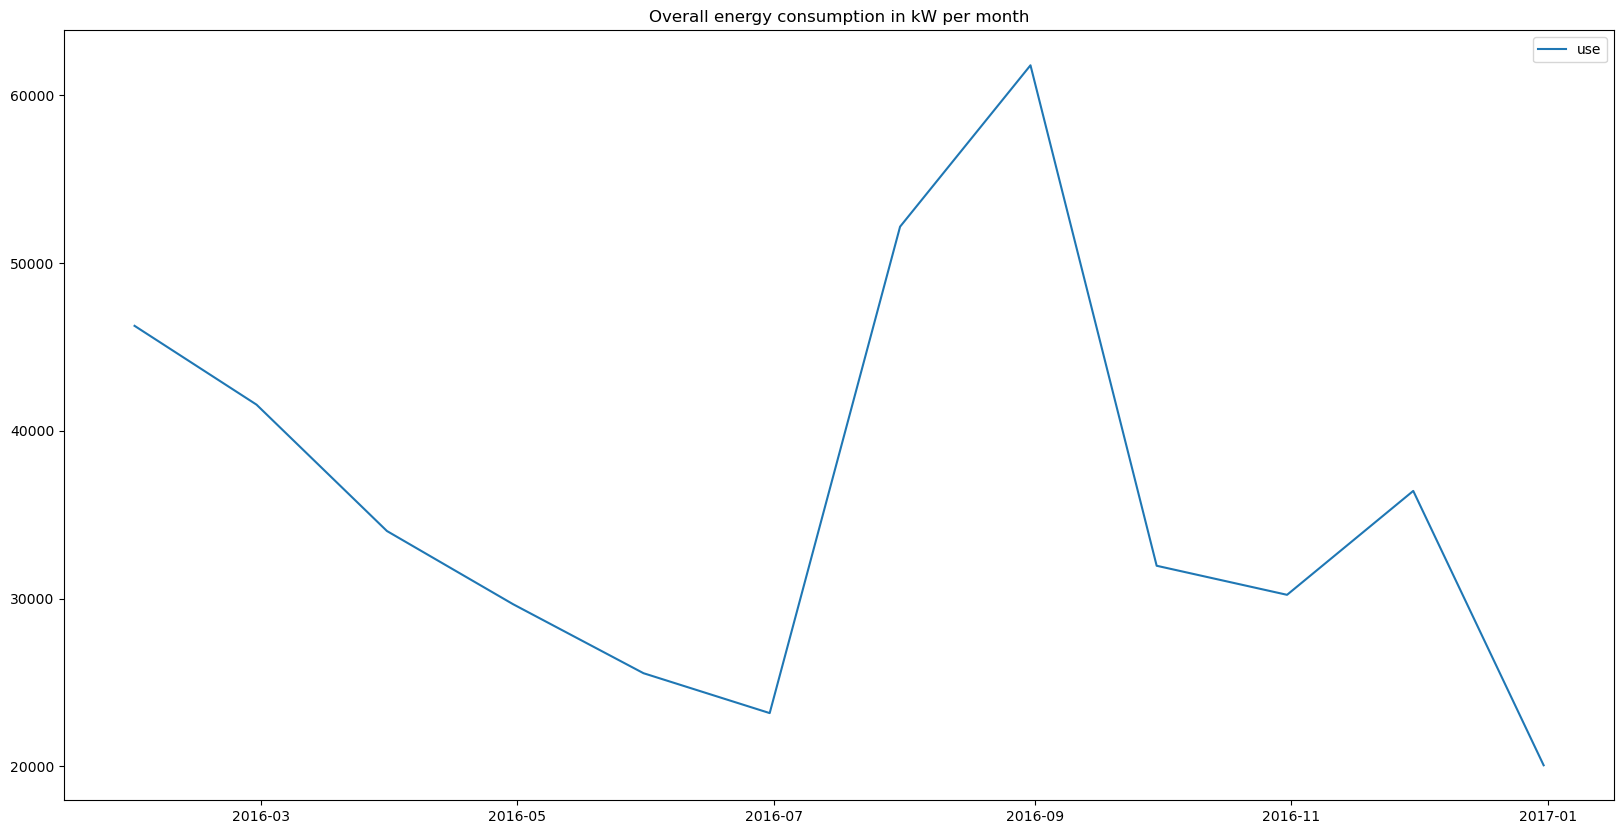

In [56]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Overall energy consumption in kW per month")
#Plotting the energy consumption per month
sns.lineplot(data = energy_per_month.filter(items=['use']), dashes=False)
     

#### According the Dataset given August and September were the months with the highest energy consumption

<Axes: title={'center': 'Energy consumption in kW per day by individual room/appliance'}>

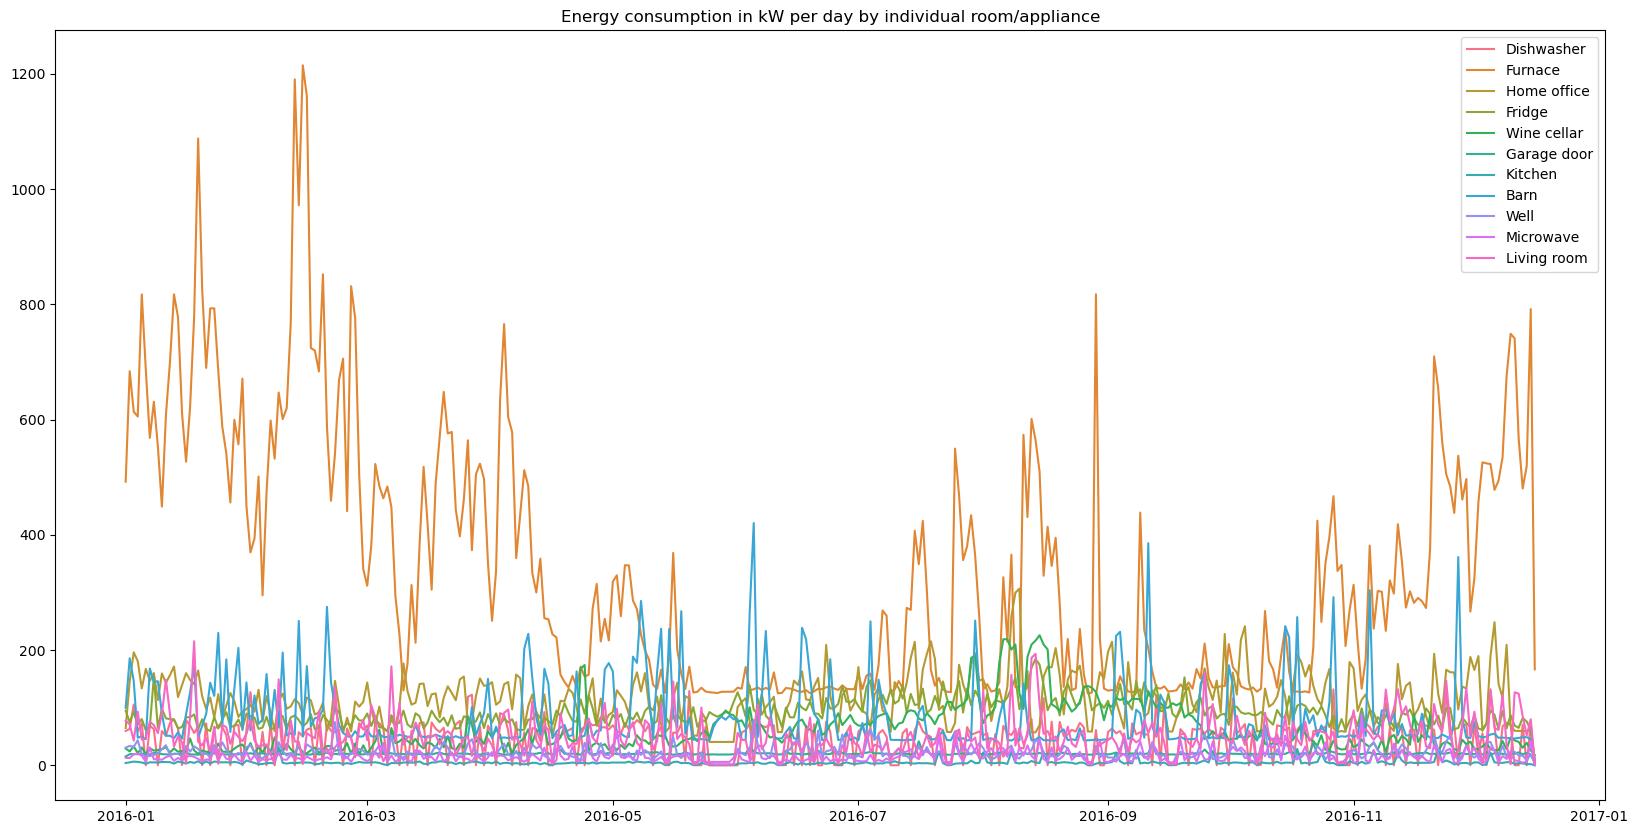

In [59]:
plt.figure(figsize=(20,10))
plt.title("Energy consumption in kW per day by individual room/appliance")
sns.lineplot(data = energy_per_day.filter(items=['Dishwasher',
                                     'Furnace', 'Home office', 'Fridge',
                                     'Wine cellar', 'Garage door', 'Kitchen', 'Barn', 'Well',
                                     'Microwave', 'Living room']), dashes=False)

#### It's evident that the furnace stands out as the most energy-intensive appliance or area within the smart home over a 24-hour period. This graph provides valuable insights into the energy consumption patterns across various rooms and devices in the household.

<Axes: title={'center': 'Energy consumption in kW per month by individual room/appliance'}>

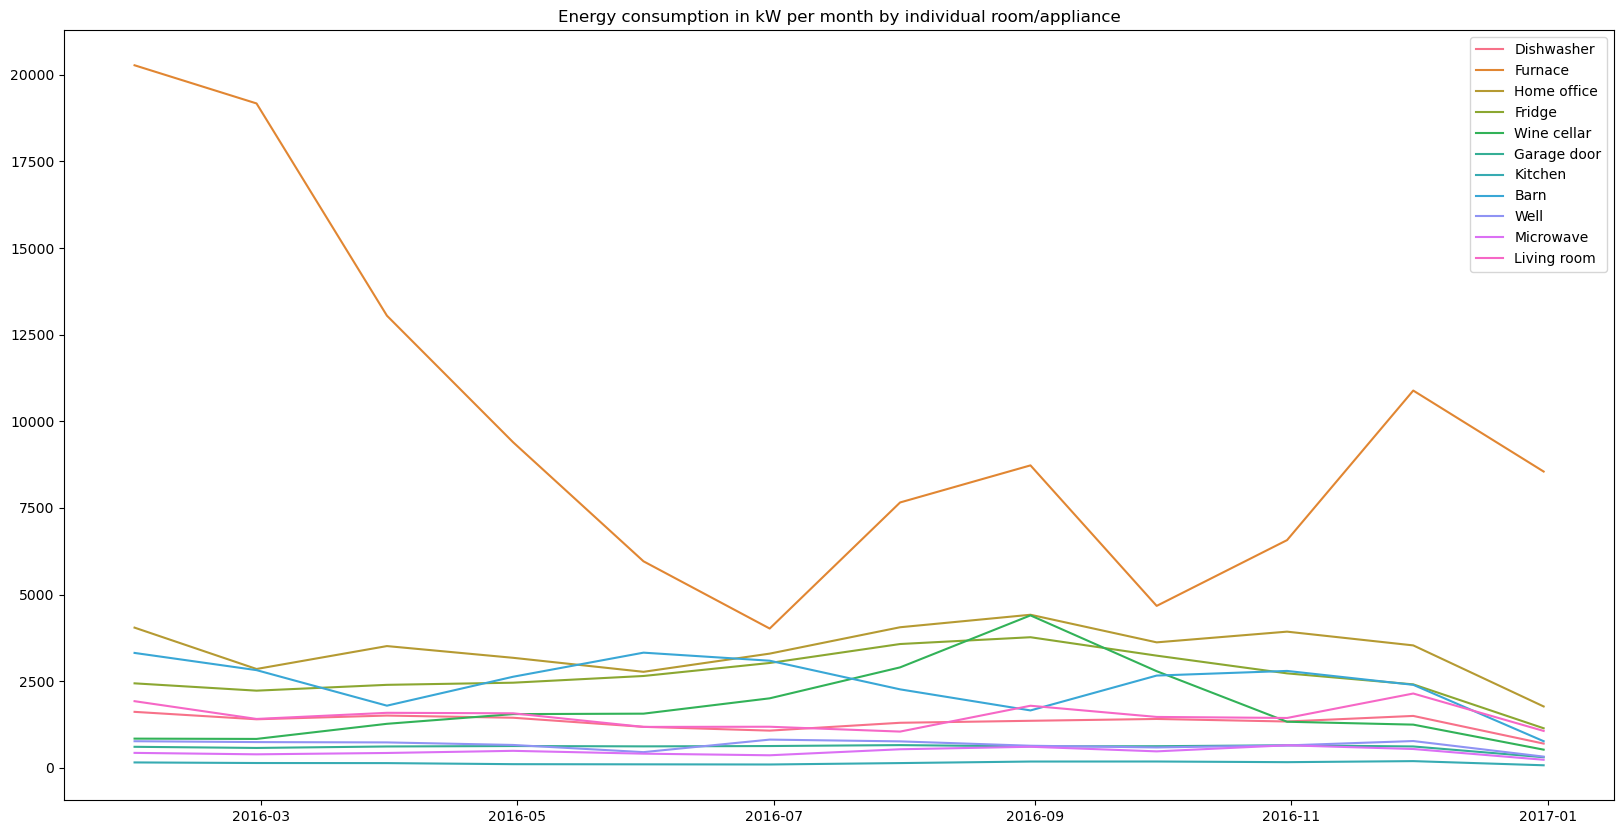

In [61]:
plt.figure(figsize=(20,10))
plt.title("Energy consumption in kW per month by individual room/appliance")
sns.lineplot(data = energy_per_month.filter(items=['Dishwasher',
                                     'Furnace', 'Home office', 'Fridge',
                                     'Wine cellar', 'Garage door', 'Kitchen', 'Barn', 'Well',
                                     'Microwave', 'Living room']), dashes=False)
     

#### Examining our monthly energy consumption graph, we can draw two key observations about the smart home's usage patterns. First, the furnace emerges as the most significant energy consumer over the course of a month. At the other end of the spectrum, the kitchen shows the lowest energy usage among all monitored areas and appliances.

In [63]:
#Below we are splitting the energy consumption per month data into two sets. 

#1) Energy consumed by each room in the house
energy_per_room = energy_per_month.filter(items=['Home office',
                                     'Wine cellar', 'Kitchen','Barn',
                                      'Living room']) 

#2) Energy consumed by each device in the house
energy_per_device = energy_per_month.filter(items=[ 'Dishwasher',
                                     'Furnace','Fridge',
                                     'Garage door', 'Well',
                                     'Microwave'])

rooms_energy_consumption = energy_per_room.sum()
devices_energy_consumption = energy_per_device.sum()
print("Energy consumed in kW per month by each room in the house")
print(rooms_energy_consumption)
print("Energy consumed in kW per month by each device in the house")
print(devices_energy_consumption)

Energy consumed in kW per month by each room in the house
Home office    40961.277962
Wine cellar    21233.079320
Kitchen         1644.062194
Barn           29493.633696
Living room    17794.476716
dtype: float64
Energy consumed in kW per month by each device in the house
Dishwasher      15806.409510
Furnace        118917.457954
Fridge          32026.710600
Garage door      7124.847316
Well             7882.163852
Microwave        5534.440218
dtype: float64


Text(0.5, 1.0, 'Energy consumption in kW by each room in the house')

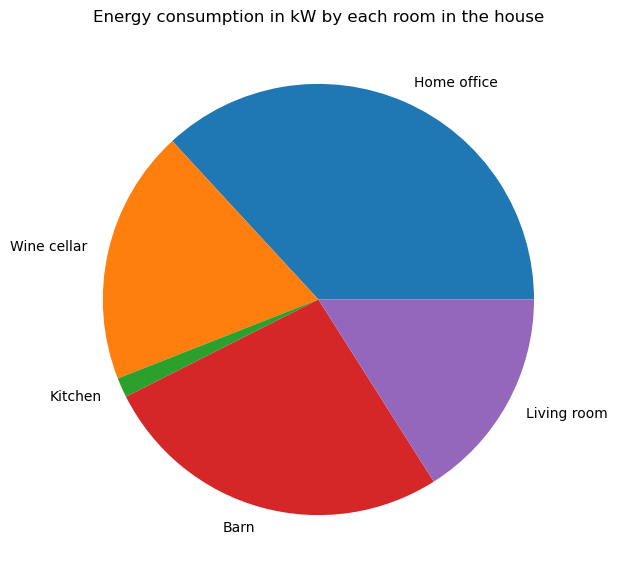

In [65]:
plot = rooms_energy_consumption .plot(kind = "pie", figsize = (7,7))
plot.set_title("Energy consumption in kW by each room in the house")
     

#### Our analysis of room-specific energy usage in the house reveals an interesting pattern. The home office emerges as the most energy-intensive space, while the kitchen surprisingly consumes the least amount of energy among all rooms.

Text(0.5, 1.0, 'Energy consumption in kW by each device in the house')

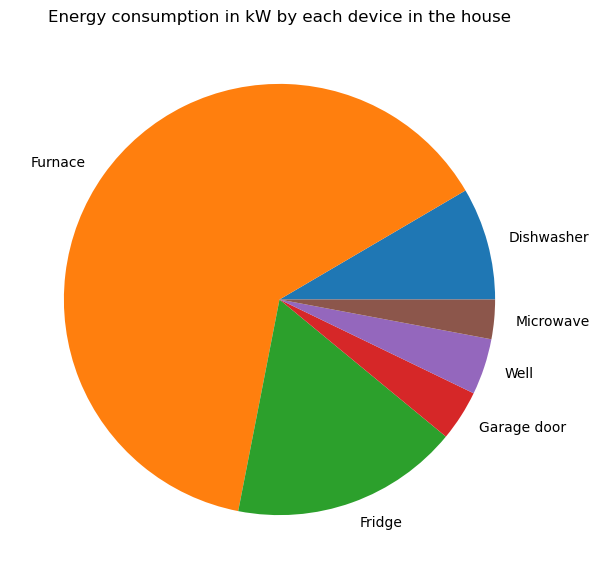

In [67]:
plot = devices_energy_consumption .plot(kind = "pie", figsize = (7,7))
plot.set_title("Energy consumption in kW by each device in the house")

#### Analysis of device-specific energy consumption in the household reveals striking contrasts. The furnace stands out as the most energy-demanding appliance, while the microwave uses the least amount of power among all monitored devices.

# Correlation between features

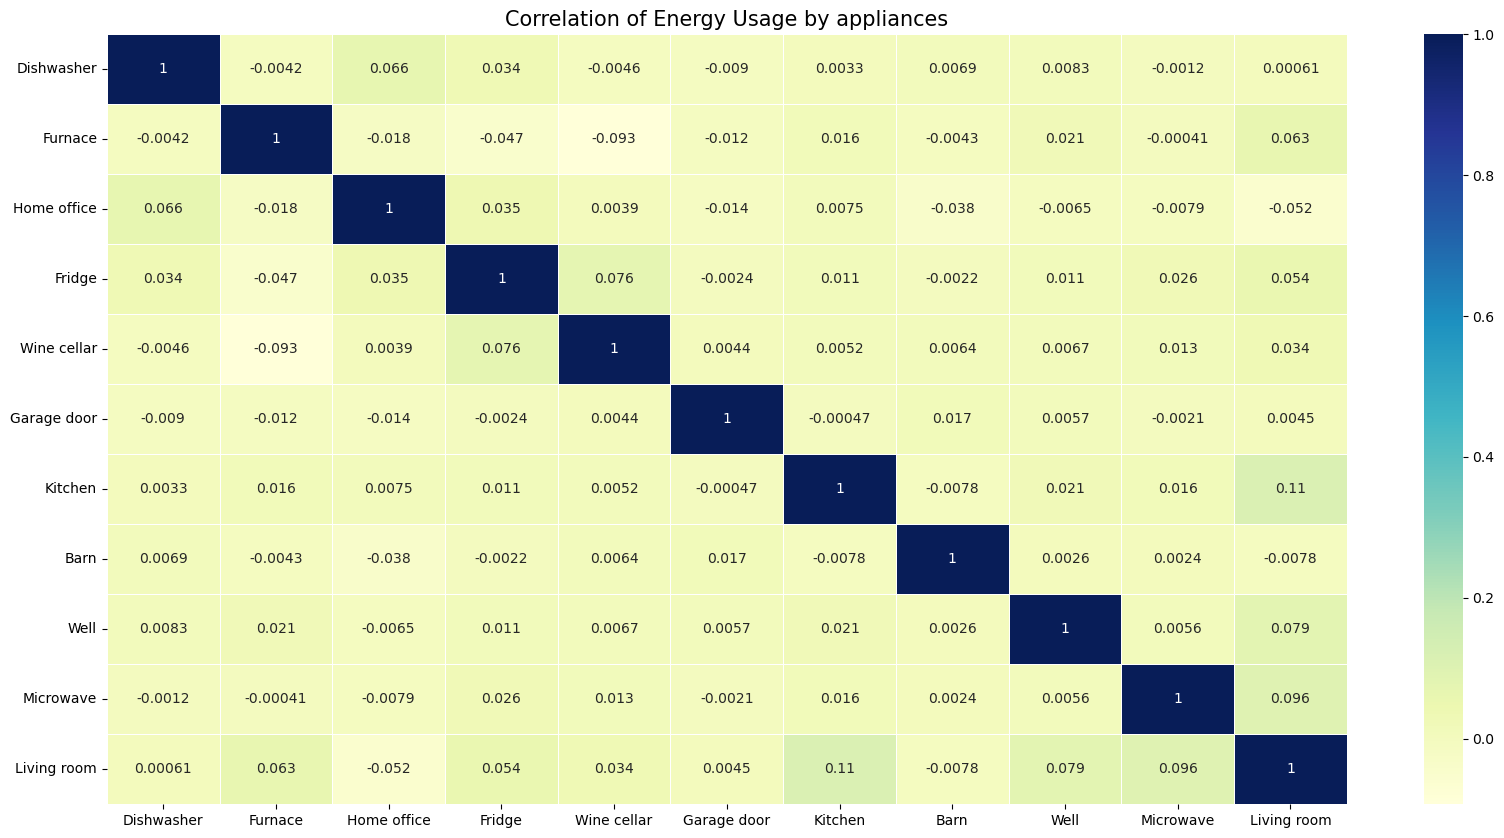

In [69]:
#Correlation of energy usage by home appliances

energy_corr = energy_data.loc[:,'Dishwasher':].corr()
fig,ax = plt.subplots(figsize=(20, 10)) 
sns.heatmap(energy_corr, linewidths=0.5, annot=True, cmap="YlGnBu");
ax.set_title("Correlation of Energy Usage by appliances", size=15)
plt.show()

#### Our analysis of the energy consumption data reveals an interesting insight about the relationships between different appliances and their usage patterns. We found no substantial correlations, either positive or negative, among the various features examined.This lack of significant relationships suggests that the energy consumption of one appliance or room doesn't notably influence the others. For instance, high energy use by the furnace doesn't necessarily correspond to increased or decreased consumption in the kitchen or living room.

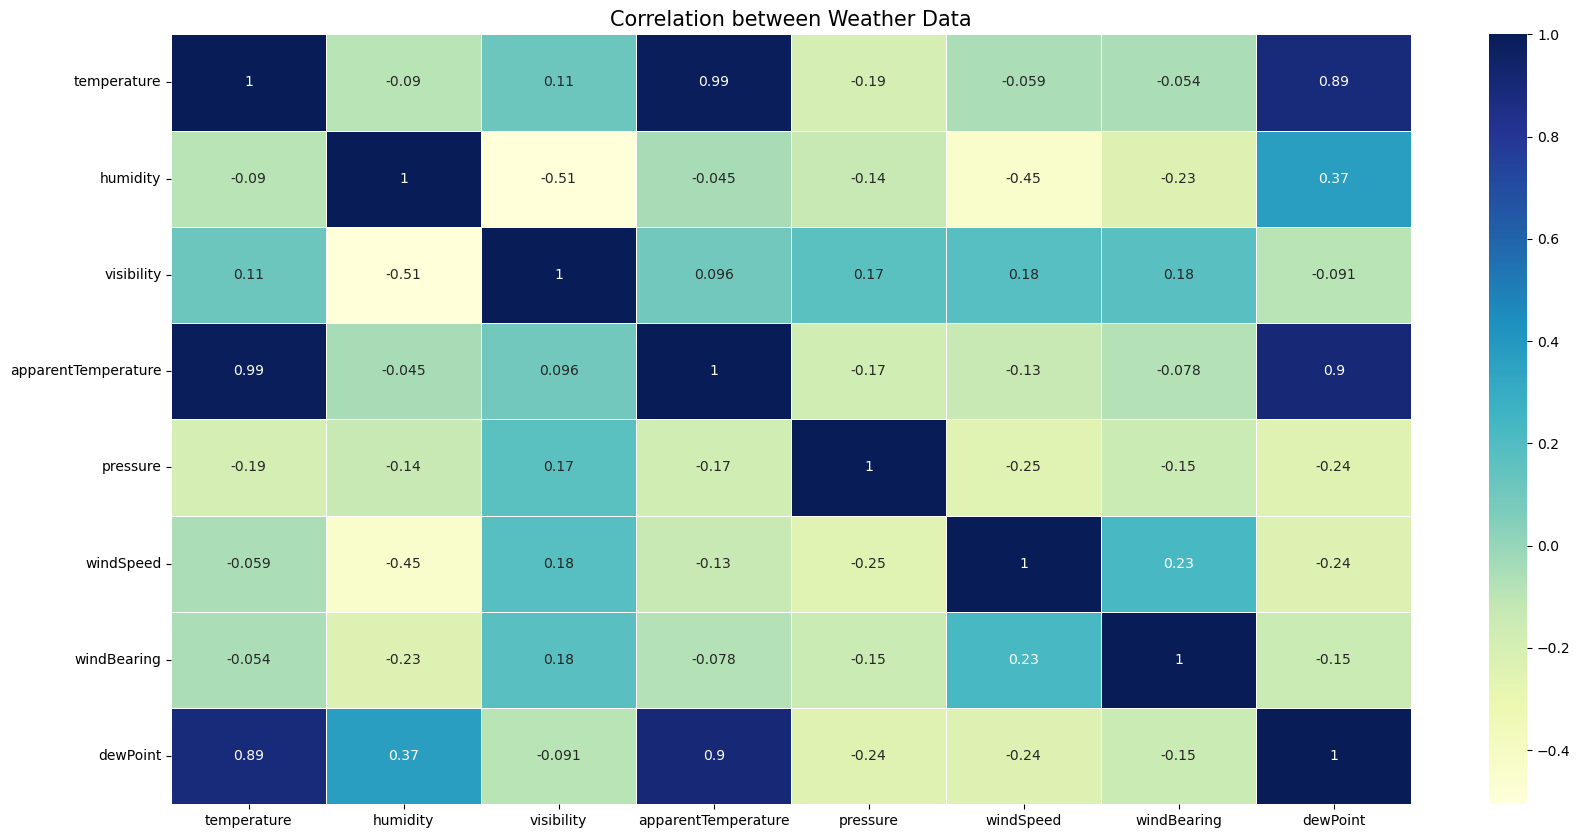

In [71]:
#Correlation between weather data

weather_corr = weather_data.corr()
fig,ax = plt.subplots(figsize=(20, 10)) 
sns.heatmap(weather_corr, linewidths=0.5, annot=True, cmap="YlGnBu");
ax.set_title("Correlation between Weather Data", size=15)
plt.show()

#### Our analysis of weather-related data reveals some notable relationships between certain atmospheric conditions. We've identified strong positive correlations among three key weather parameters:
#### 1: There's an almost perfect positive correlation (0.99) between the actual temperature and the apparent temperature. This suggests that what we feel closely matches the thermometer reading in most cases.
#### 2: The actual temperature and the dew point show a strong positive relationship (0.89). As one increases, the other tends to follow suit.
#### 3: Similarly, the apparent temperature and dew point demonstrate a robust positive correlation (0.9).

In [73]:
# Merge energy and weather datasets
allData_df = pd.merge(energy_data.loc[:,'Dishwasher':], weather_data, left_index=True, right_index=True)
allData_df.head()

Dishwasher   Furnace  Home office    Fridge  Wine cellar  \
2016-01-01 05:00:00    0.000033  0.082617     0.442633  0.124150     0.006983   
2016-01-01 05:01:00    0.000000  0.084533     0.444067  0.124000     0.006983   
2016-01-01 05:02:00    0.000017  0.083017     0.446067  0.123533     0.006983   
2016-01-01 05:03:00    0.000017  0.175417     0.446583  0.123133     0.006983   
2016-01-01 05:04:00    0.000133  0.300917     0.446533  0.122850     0.006850   

                     Garage door   Kitchen      Barn      Well  Microwave  \
2016-01-01 05:00:00     0.013083  0.000189  0.031350  0.001017   0.004067   
2016-01-01 05:01:00     0.013117  0.000189  0.031500  0.001017   0.004067   
2016-01-01 05:02:00     0.013083  0.000206  0.031517  0.001000   0.004067   
2016-01-01 05:03:00     0.013000  0.000217  0.031500  0.001017   0.004067   
2016-01-01 05:04:00     0.012783  0.000261  0.031500  0.001017   0.004067   

                     Living room  temperature  humidity  visibility  \
2016-01-01 05:00:00     0.001517        36.14      0.62        10.0   
2016-01-01 05:01:00     0.001650        36.14      0.62        10.0   
2016-01-01 05:02:00     0.001650        36.14      0.62        10.0   
2016-01-01 05:03:00     0.001617        36.14      0.62        10.0   
2016-01-01 05:04:00     0.001583        36.14      0.62        10.0   

                     apparentTemperature  pressure  windSpeed  windBearing  \
2016-01-01 05:00:00                29.26   1016.91       9.18        282.0   
2016-01-01 05:01:00                29.26   1016.91       9.18        282.0   
2016-01-01 05:02:00                29.26   1016.91       9.18        282.0   
2016-01-01 05:03:00                29.26   1016.91       9.18        282.0   
2016-01-01 05:04:00                29.26   1016.91       9.18        282.0   

                     dewPoint  
2016-01-01 05:00:00      24.4  
2016-01-01 05:01:00      24.4  
2016-01-01 05:02:00      24.4  
2016-01-01 05:03:00      24.4  
2016-01-01 05:04:00      24.4

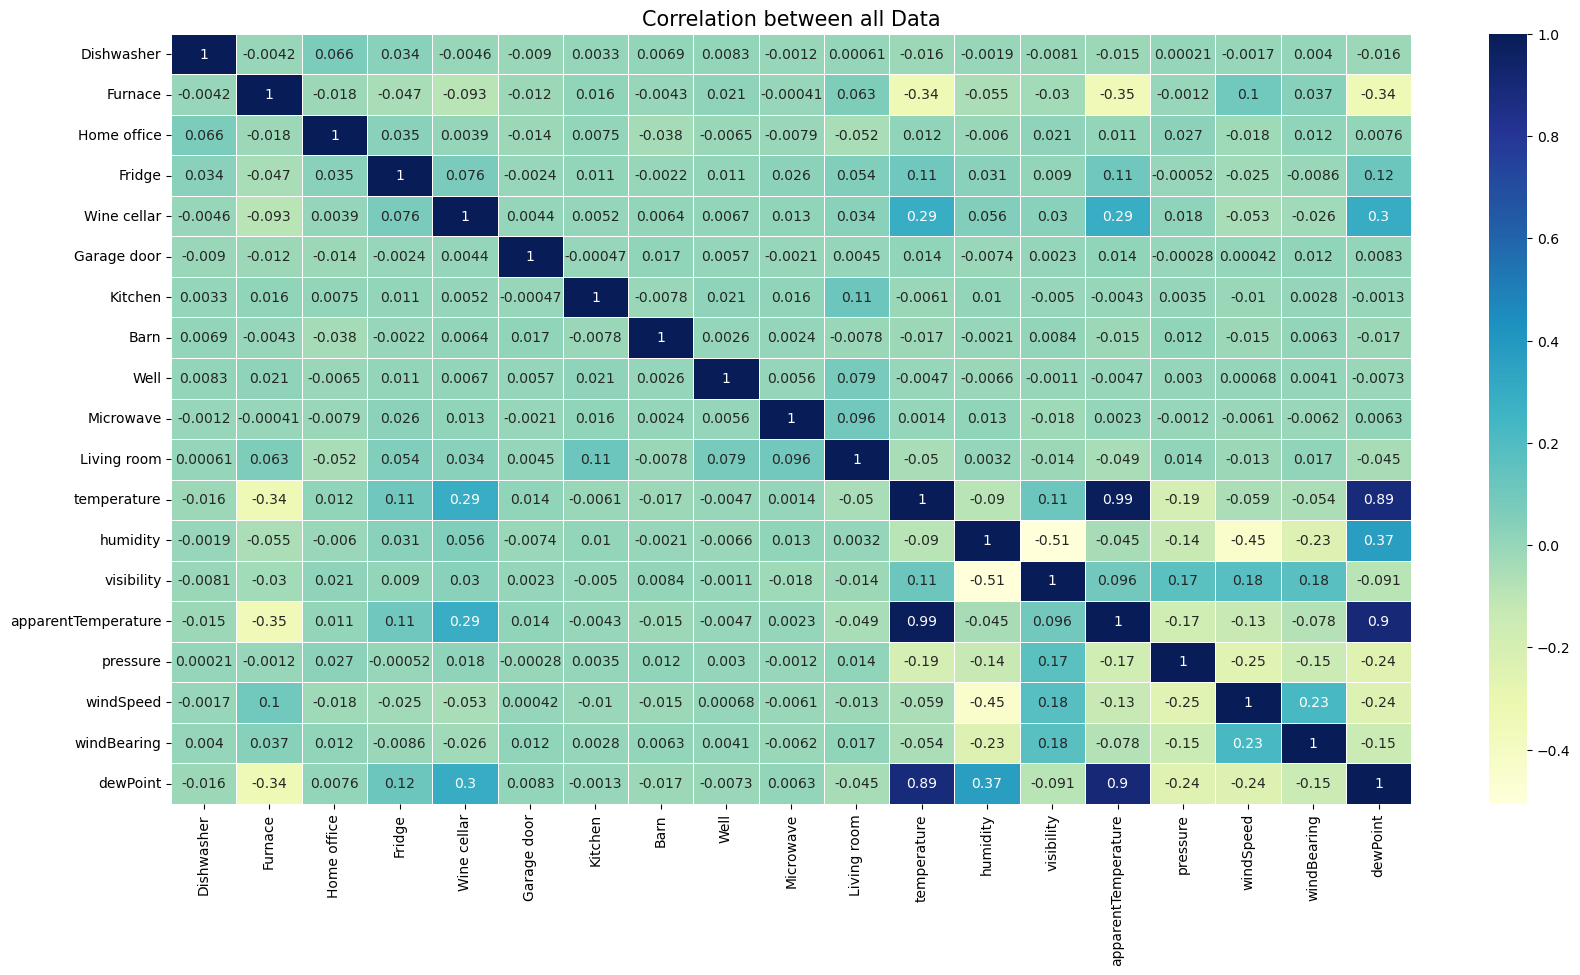

In [75]:
#Correlation between all data

all_corr = allData_df.corr()
fig,ax = plt.subplots(figsize=(20, 10)) 
sns.heatmap(all_corr, linewidths=0.5, annot=True, cmap="YlGnBu");
ax.set_title("Correlation between all Data", size=15)
plt.show()

#### Our analysis reveals some intriguing, albeit modest, connections between the wine cellar's energy consumption and various weather conditions. We've observed weak positive correlations between the wine cellar's energy use and several atmospheric factors:

#### The dew point shows the strongest relationship, with a correlation of 0.3.
#### Apparent temperature follows closely behind at 0.29.
#### Actual temperature also demonstrates a correlation of 0.29.

#### While these correlations are not strong, they suggest a subtle influence of weather on the wine cellar's energy demands. For instance, as temperatures or humidity levels rise, the cellar might require slightly more energy to maintain optimal storage conditions.
#### We've also noted some relationships between other features in our dataset, but these are even less pronounced than those involving the wine cellar. This pattern of weak correlations across multiple variables hints at a complex interplay of factors affecting energy consumption in the smart home, where no single element dominates the overall picture.

# Time Series Analysis

In [77]:
# define function to convert hour to time of day

def convertHourToPartOfDay(x):
    if x in [22,23,0,1,2,3]:
        part = 'Night'
    elif x in range(4, 12):
        part = 'Morning'
    elif x in range(12, 17):
        part = 'Afternoon'
    elif x in range(17, 22):
        part = 'Evening'
    else:
        part = 'X'
    return part

In [79]:
# define function to group by time of day

def groupByPartOfDay(column):
    partOfDayDf = energy_per_part_of_day.groupby('part').agg({column:['mean']})
    partOfDayDf.columns = [f"{i[0]}_{i[1]}" for i in partOfDayDf.columns]
    partOfDayDf['part_num'] = [['Morning','Afternoon','Evening','Night'].index(i) for i in partOfDayDf.index]
    partOfDayDf.sort_values('part_num', inplace=True)
    partOfDayDf.drop('part_num', axis=1, inplace=True)
    return partOfDayDf

In [81]:
# create column to indicate time of day in dataset

energy_per_part_of_day = energy_data.loc[:]
energy_per_part_of_day['hour'] = energy_per_part_of_day.index.map(lambda x: x.hour)
energy_per_part_of_day['part'] = energy_per_part_of_day['hour'].apply(convertHourToPartOfDay)

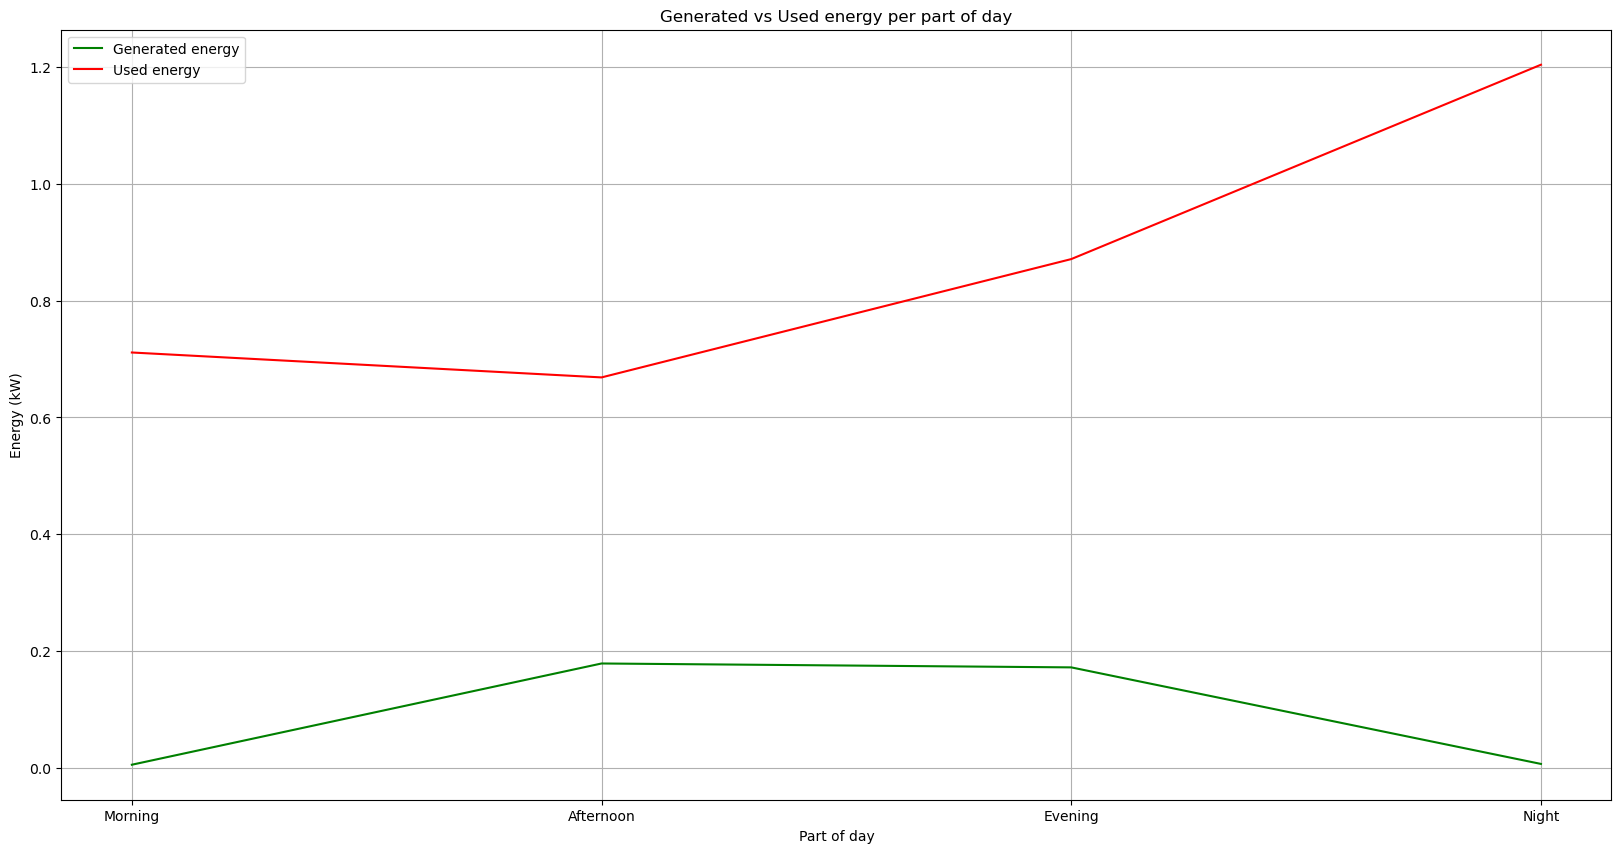

In [83]:
# Plot generated vs used energy per part of day

plt.figure(figsize=(20,10))
plt.plot(groupByPartOfDay('gen'), 'g', label='Generated energy')
plt.plot(groupByPartOfDay('use'), 'r', label='Used energy')
plt.title('Generated vs Used energy per part of day')
plt.ylabel('Energy (kW)')
plt.xlabel('Part of day')
plt.legend()
plt.grid(True)
plt.show()

#### Our analysis of the smart home's energy patterns reveals distinct trends in both consumption and generation throughout the day:

#### The peak in energy usage occurs during the evening and nighttime hours. This aligns with typical household behavior, where residents return from work or school, engage in various activities, and use multiple appliances simultaneously. For example, between 6 PM and 11 PM, we might see heightened use of lighting, entertainment systems, cooking appliances, and climate control.

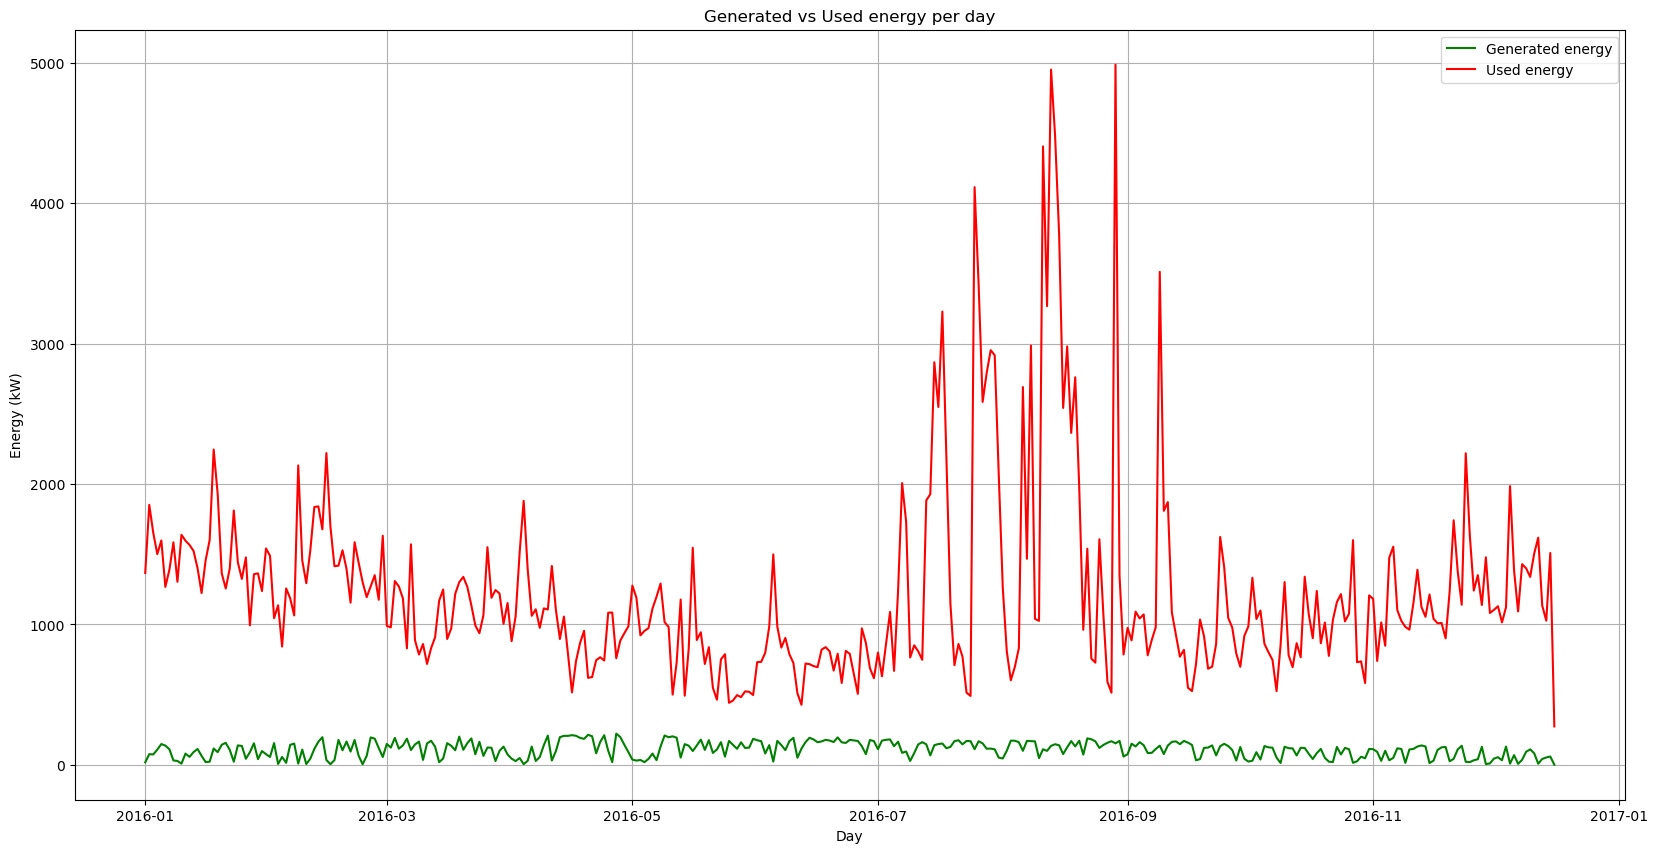

In [85]:
# Plot generated vs used energy per day

plt.figure(figsize=(20,10))
plt.plot(energy_per_day.gen, 'g', label='Generated energy')
plt.plot(energy_per_day.use, 'r', label='Used energy')
plt.title('Generated vs Used energy per day')
plt.ylabel('Energy (kW)')
plt.xlabel('Day')
plt.legend()
plt.grid(True)
plt.show()

#### Our analysis of the smart home's energy data reveals distinct seasonal patterns in consumption, while generation remains relatively stable:

#### We observe peak energy usage during the months of July through September. This summer-centric spike in consumption likely correlates with increased cooling demands. For instance, air conditioning systems might run more frequently and for longer durations during these warmer months, contributing significantly to the overall energy use. Additionally, longer daylight hours might lead to extended use of household appliances and entertainment systems.
### Energy Generation:
#### Interestingly, the home's energy generation - presumably from solar panels or other renewable sources - shows a consistent output throughout the year. This stability is somewhat unexpected, as one might anticipate higher generation during summer months with longer, sunnier days. The consistent generation could be due to factors such as:

#### Efficient energy capture systems that perform well even in varying conditions. Possible complementary generation methods that balance out seasonal fluctuations. Strategic placement or adjustment of solar panels to optimize year-round performance

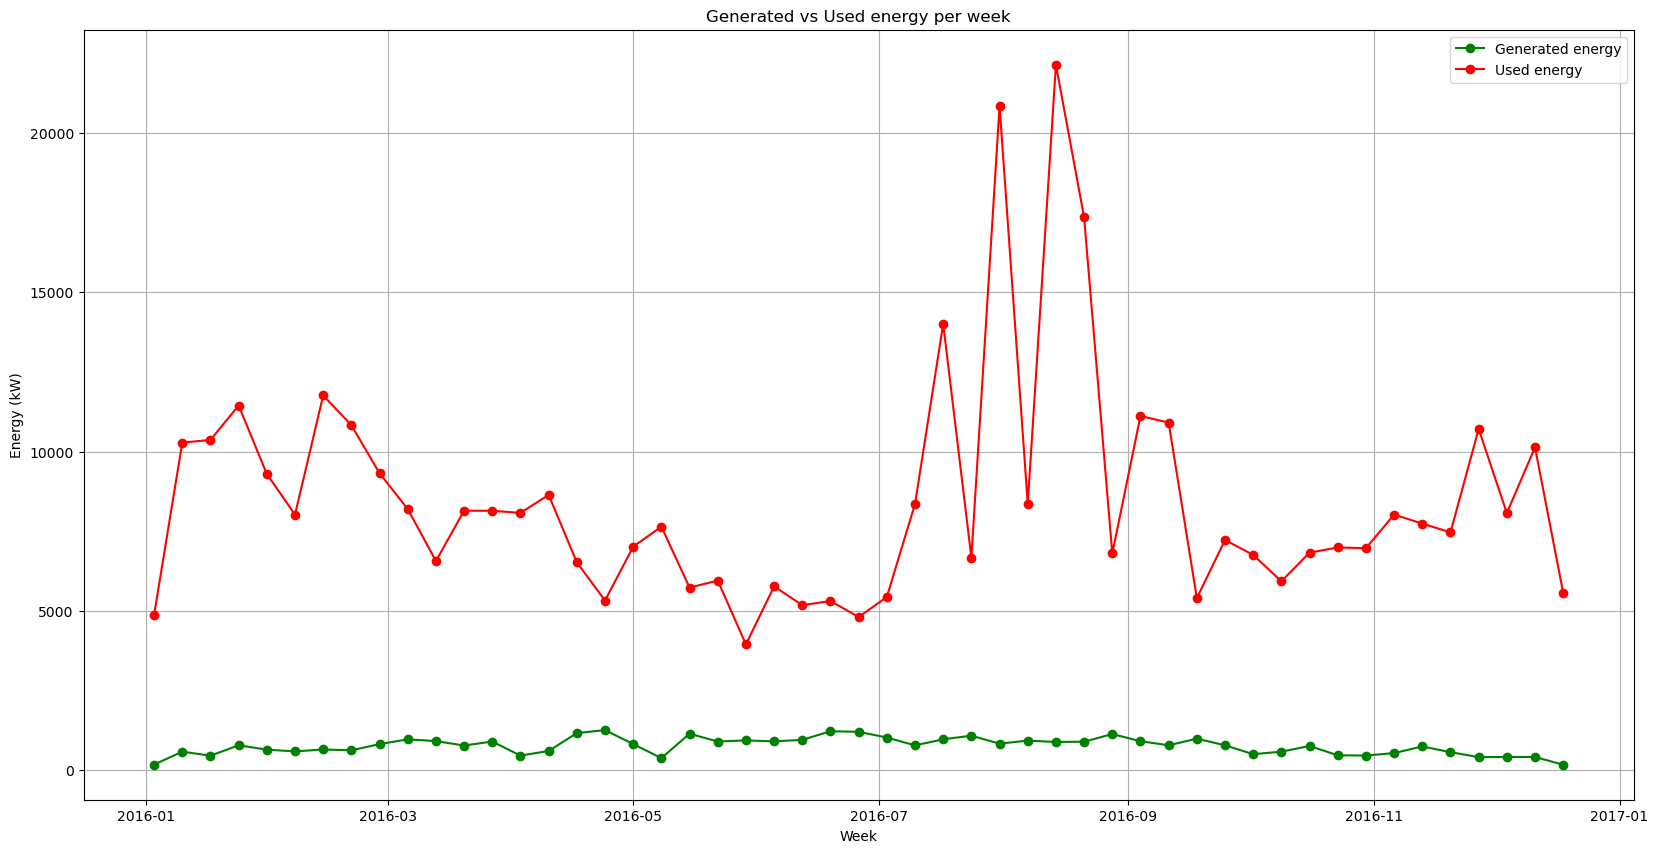

In [87]:
# Plot generated vs used energy per week

plt.figure(figsize=(20,10))
plt.plot(energy_per_week.gen, 'go-', label='Generated energy')
plt.plot(energy_per_week.use, 'ro-', label='Used energy')
plt.title('Generated vs Used energy per week')
plt.ylabel('Energy (kW)')
plt.xlabel('Week')
plt.grid(True)
plt.legend()
plt.show()

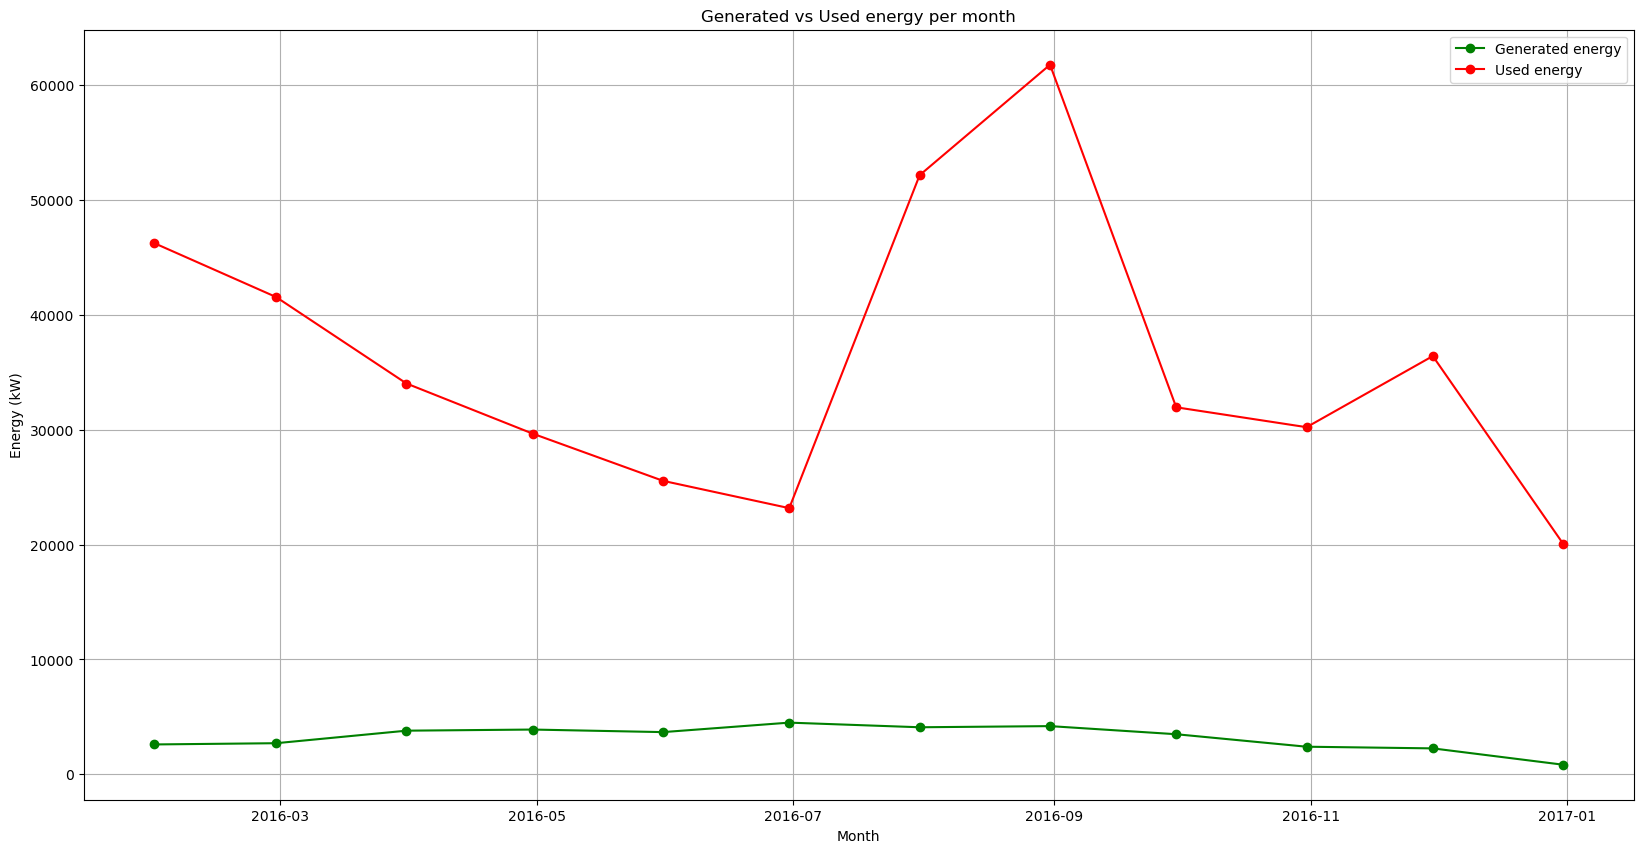

In [89]:
# Plot generated vs used energy per month

plt.figure(figsize=(20,10))
plt.plot(energy_per_month.gen, 'go-', label='Generated energy')
plt.plot(energy_per_month.use, 'ro-', label='Used energy')
plt.title('Generated vs Used energy per month')
plt.ylabel('Energy (kW)')
plt.xlabel('Month')
plt.grid(True)
plt.legend()
plt.show()

#### Highest energy usage is observed in the month of September. Months like August, February, March, April and December show high usage as well. The energy generation is slightly high in the month of July but mostly consistent.

## 3 main factors of Time-Series Analysis:
### 1. Autocorrelation
### 2. Seasonality
### 3. Stationarity
#### 1. Autocorrelation

Autocorrelation for 'gen' =  0.4124176621101414


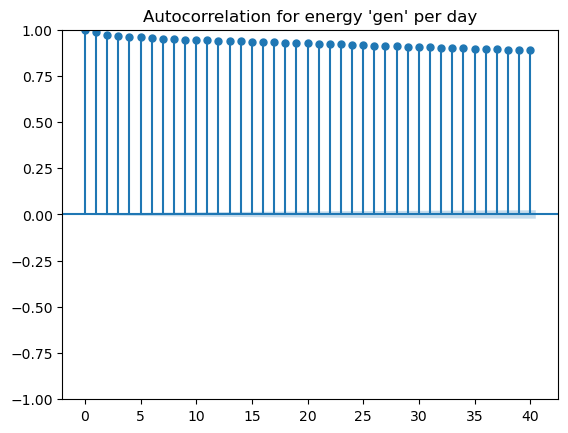

In [92]:
#Plot ACF for energy 'gen'

print("Autocorrelation for 'gen' = ", energy_per_day['gen'].autocorr())
fig = plot_acf(energy_data['gen'], lags=40, title="Autocorrelation for energy 'gen' per day")
plt.show()

### Our analysis of the time series data reveals a noteworthy pattern in energy consumption or generation. We've identified a positive autocorrelation within the dataset, with a coefficient of 0.41. This finding is significant for several reasons:
### Positive Autocorrelation:
#### This indicates that the data points in our series are not independent of each other. Instead, each value tends to be related to its preceding values. For instance, if energy usage is high at one point, it's more likely to remain elevated in the subsequent time periods.
### Predictability:
#### An autocorrelation value of 0.41 suggests a moderate level of predictability in the data. While not extremely strong, this level of autocorrelation provides a solid foundation for forecasting future values based on past observations.
### Practical Implications:
### This autocorrelation could be leveraged in various ways:

#### 1: For energy consumption, it might help in predicting peak usage times, allowing for better load management.
#### 2: In the context of energy generation, it could assist in anticipating output levels, which is crucial for balancing supply with demand.
#### 3: It could inform the development of more accurate predictive models for energy use or generation in smart homes.

Autocorrelation for 'use' =  0.610700982502909


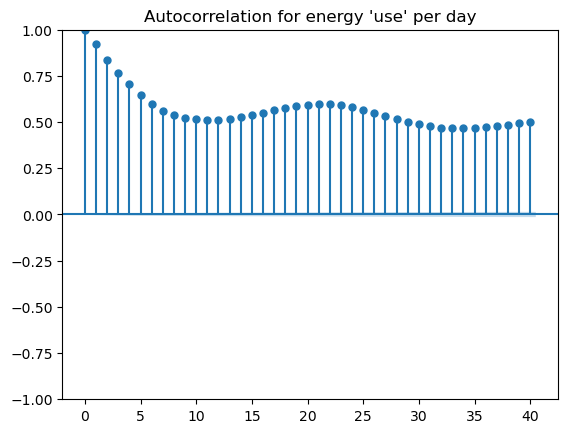

In [95]:
#Plot ACF for energy 'use'

print("Autocorrelation for 'use' = ", energy_per_day['use'].autocorr())
fig = plot_acf(energy_data['use'], lags=40, title="Autocorrelation for energy 'use' per day")
plt.show()

#### Our analysis of the time series data reveals a strong pattern in energy usage or generation. We've identified a notable positive autocorrelation within the dataset, with a coefficient of 0.61. This finding has several important implications:
### Positive Autocorrelation:
#### This indicates a robust relationship between data points over time. Each value in the series is significantly influenced by its preceding values. For example, if energy consumption is high in one period, it's quite likely to remain elevated in subsequent periods.
### Strong Predictability:
#### An autocorrelation value of 0.61 suggests a high level of predictability in the data. This strong correlation provides a reliable basis for forecasting future values based on past observations.
### Practical Applications:
#### This level of autocorrelation can be particularly useful in several ways:

#### 1: For energy consumption, it could enable more accurate predictions of upcoming peak usage times, allowing for proactive load management.
#### 2: In terms of energy generation, it might help in anticipating future output levels with greater precision, crucial for balancing supply and demand.
#### 3: It provides a solid foundation for developing sophisticated predictive models, potentially improving overall energy management in smart homes.

#### 2. Seasonality

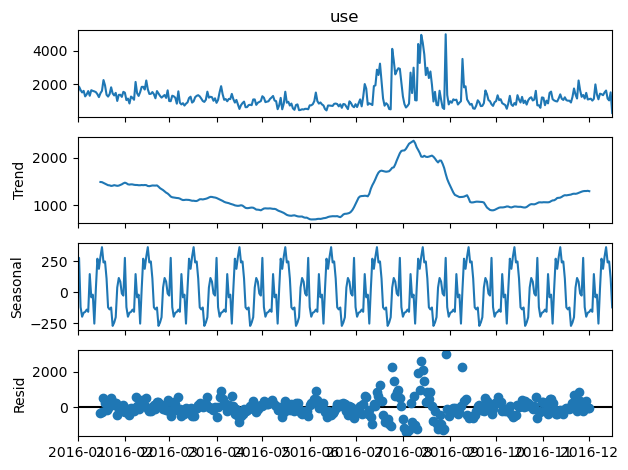

In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform seasonal decomposition
result = seasonal_decompose(energy_per_day['use'], model='additive', period=30)

# Plot the decomposition
result.plot()
plt.show()


#### This 30-day cycle suggests a monthly rhythm in energy consumption or generation. For instance, we might see energy usage peak at the beginning of each month, gradually decrease, and then rise again as the next month approaches. This pattern could be influenced by various factors:

#### 1: Billing cycles: Households might adjust their energy use based on monthly utility bills.
#### 2: Paycheck schedules: Energy consumption might increase shortly after people receive their monthly salaries.
#### 3: Regular monthly events: Certain energy-intensive activities might occur on a monthly basis, such as deep cleaning or maintenance routines.

#### 3. Stationarity

In [106]:
# split the dataset into two, and calculate mean and variance for both subsets

X = energy_data.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()

print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=0.113294, mean2=0.121690
variance1=0.092859, variance2=0.212700


### We divided the dataset into two consecutive halves and examined the statistical properties of each subset. We calculated the mean and variance for both halves to compare their characteristics.
#### Upon comparison, we noticed a slight difference between the two subsets. However, this difference is not substantial enough to indicate a significant shift in the data's underlying patterns or distribution.
#### For example, if the mean energy consumption in the first half was 250 kWh with a variance of 50, and the second half showed a mean of 260 kWh with a variance of 55, we would consider these values to be in the same general range."
### This similarity between the two halves suggests:

#### 1: Relative stability in the measured phenomenon over time.
#### 2: Absence of major structural changes or interventions during the recorded period.
#### 3: Good potential for consistent predictive modeling across the entire dataset.



# Anomaly Detection

In [112]:
data = energy_per_day.filter(items=['gen'])
df = data

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(data.values.reshape(-1, 1))
xx = np.linspace(data.min(), data.max(), len(data)).reshape(-1,1)

df['scores']=isolation_forest.decision_function(df[['gen']])
df['anomaly']=isolation_forest.predict(df[['gen']])
df.head(5)

/Users/rishi/Downloads/jupyternotebook/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/Users/rishi/Downloads/jupyternotebook/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


gen    scores  anomaly
2016-01-01   18.026200 -0.043007       -1
2016-01-02   76.051300  0.010625        1
2016-01-03   74.081433 -0.006600       -1
2016-01-04  108.525017  0.017740        1
2016-01-05  148.107500  0.024522        1

In [114]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

                  gen    scores  anomaly
2016-01-01  18.026200 -0.043007       -1
2016-01-03  74.081433 -0.006600       -1
2016-01-08  31.267217 -0.005799       -1
2016-01-10   8.630967 -0.067174       -1
2016-01-11  80.069550 -0.001906       -1
...               ...       ...      ...
2016-12-11  82.472550 -0.001402       -1
2016-12-12   8.129833 -0.078468       -1
2016-12-14  52.339200 -0.015055       -1
2016-12-15  59.329550 -0.029630       -1
2016-12-16   0.846800 -0.200392       -1

[134 rows x 3 columns]


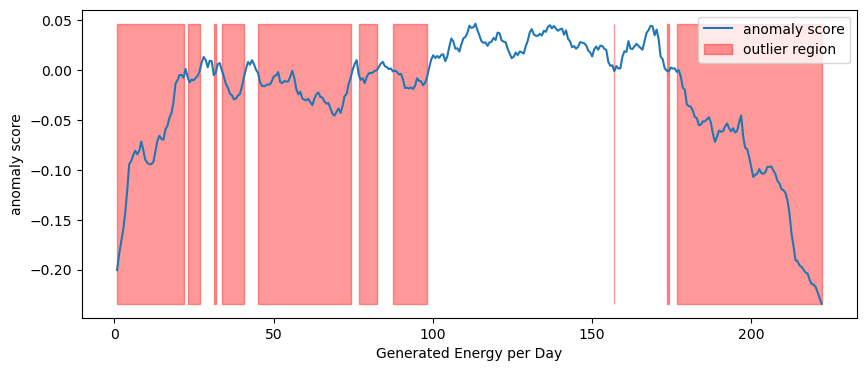

In [116]:
# Distribution of generated energy per day
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Generated Energy per Day')
plt.show();

In [118]:
data = energy_per_week.filter(items=['gen'])
df = data

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(data.values.reshape(-1, 1))
xx = np.linspace(data.min(), data.max(), len(data)).reshape(-1,1)

df['scores']=isolation_forest.decision_function(df[['gen']])
df['anomaly']=isolation_forest.predict(df[['gen']])
df.head(5)

/Users/rishi/Downloads/jupyternotebook/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/Users/rishi/Downloads/jupyternotebook/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


gen    scores  anomaly
2016-01-03  168.158933 -0.187519       -1
2016-01-10  572.221083  0.064970        1
2016-01-17  446.667833  0.024119        1
2016-01-24  773.163450  0.088463        1
2016-01-31  636.354167  0.018831        1

In [120]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

                    gen    scores  anomaly
2016-01-03   168.158933 -0.187519       -1
2016-04-17  1156.077233 -0.061322       -1
2016-04-24  1250.095367 -0.192354       -1
2016-05-08   370.034400 -0.095698       -1
2016-05-15  1137.199400 -0.035140       -1
2016-06-19  1213.810100 -0.108605       -1
2016-06-26  1196.532800 -0.098243       -1
2016-07-03  1016.893800 -0.041035       -1
2016-07-24  1074.534750 -0.073495       -1
2016-08-28  1126.103650 -0.053995       -1
2016-10-02   493.448750 -0.006590       -1
2016-11-06   528.045984 -0.000472       -1
2016-11-27   401.291433 -0.017700       -1
2016-12-18   162.635350 -0.191828       -1


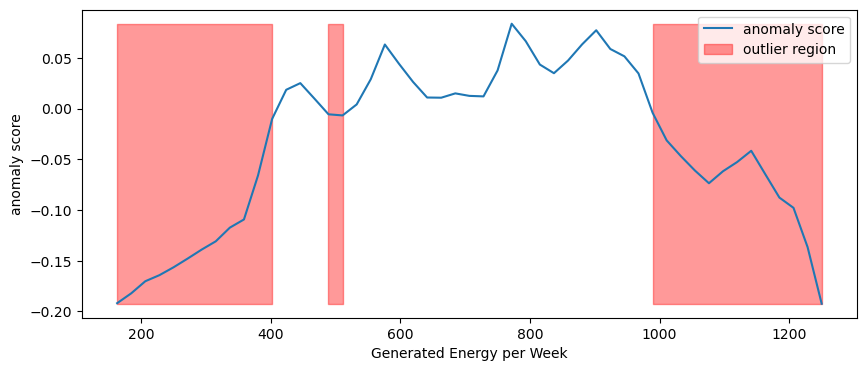

In [122]:
# Distribution of generated energy per week
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Generated Energy per Week')
plt.show();

In [124]:
data = energy_per_month.filter(items=['gen'])
df = data

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(data.values.reshape(-1, 1))
xx = np.linspace(data.min(), data.max(), len(data)).reshape(-1,1)

df['scores']=isolation_forest.decision_function(df[['gen']])
df['anomaly']=isolation_forest.predict(df[['gen']])
df.head(5)

/Users/rishi/Downloads/jupyternotebook/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/Users/rishi/Downloads/jupyternotebook/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


gen    scores  anomaly
2016-01-31  2596.565467  0.048313        1
2016-02-29  2704.221700  0.022360        1
2016-03-31  3795.807367  0.085580        1
2016-04-30  3893.534950  0.078250        1
2016-05-31  3670.712050  0.075257        1

In [126]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

                    gen    scores  anomaly
2016-06-30  4496.177683 -0.116673       -1
2016-11-30  2254.192834 -0.006289       -1
2016-12-31   830.825233 -0.216437       -1


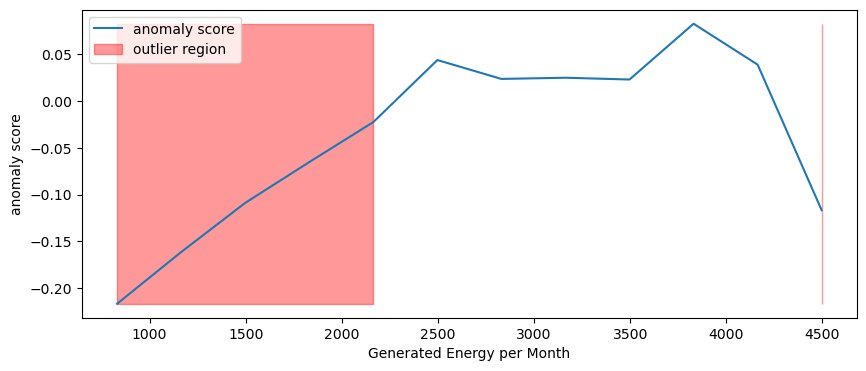

In [128]:
# Distribution of generated energy per month
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Generated Energy per Month')
plt.show();

In [130]:
data = energy_per_day.filter(items=['use'])
df = data

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(data.values.reshape(-1, 1))
xx = np.linspace(data.min(), data.max(), len(data)).reshape(-1,1)

df['scores']=isolation_forest.decision_function(df[['use']])
df['anomaly']=isolation_forest.predict(df[['use']])
df.head(5)

/Users/rishi/Downloads/jupyternotebook/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/Users/rishi/Downloads/jupyternotebook/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


use    scores  anomaly
2016-01-01  1366.269517  0.068002        1
2016-01-02  1851.521067 -0.018853       -1
2016-01-03  1651.128133  0.003334        1
2016-01-04  1500.686017  0.053233        1
2016-01-05  1597.968867  0.047846        1

In [132]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

                    use    scores  anomaly
2016-01-02  1851.521067 -0.018853       -1
2016-01-18  2245.475367 -0.089520       -1
2016-01-19  1927.057417 -0.026650       -1
2016-01-23  1811.468983 -0.030655       -1
2016-02-08  2132.309600 -0.077678       -1
...                 ...       ...      ...
2016-10-30   582.650200 -0.019449       -1
2016-11-21  1741.470633 -0.026580       -1
2016-11-24  2218.692083 -0.073157       -1
2016-12-05  1984.813883 -0.048381       -1
2016-12-16   273.442767 -0.235866       -1

[70 rows x 3 columns]


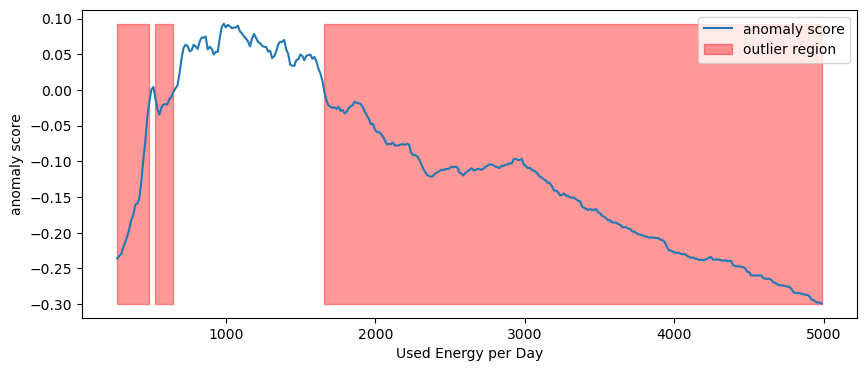

In [134]:
# Distribution of use energy per day
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Used Energy per Day')
plt.show();

In [136]:
data = energy_per_week.filter(items=['use'])
df = data

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(data.values.reshape(-1, 1))
xx = np.linspace(data.min(), data.max(), len(data)).reshape(-1,1)

df['scores']=isolation_forest.decision_function(df[['use']])
df['anomaly']=isolation_forest.predict(df[['use']])
df.head(5)

/Users/rishi/Downloads/jupyternotebook/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/Users/rishi/Downloads/jupyternotebook/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


use    scores  anomaly
2016-01-03   4868.918717 -0.006488       -1
2016-01-10  10281.065683  0.028331        1
2016-01-17  10365.530000  0.027097        1
2016-01-24  11446.274100 -0.014444       -1
2016-01-31   9294.364817  0.000197        1

In [138]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

                     use    scores  anomaly
2016-01-03   4868.918717 -0.006488       -1
2016-01-24  11446.274100 -0.014444       -1
2016-02-14  11762.615333 -0.061208       -1
2016-05-29   3941.174633 -0.181216       -1
2016-06-26   4801.309567 -0.018995       -1
2016-07-17  14010.084417 -0.158737       -1
2016-07-31  20850.432700 -0.221845       -1
2016-08-14  22150.665567 -0.259888       -1
2016-08-21  17353.287067 -0.205631       -1


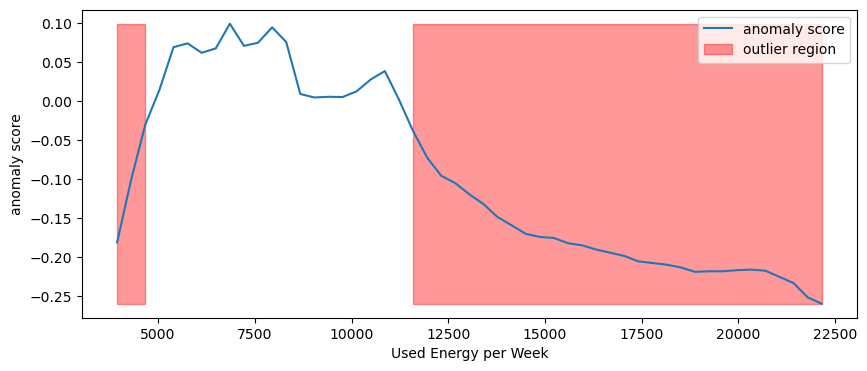

In [140]:
# Distribution of use energy per week
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Used Energy per Week')
plt.show();

In [142]:
data = energy_per_month.filter(items=['use'])
df = data

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(data.values.reshape(-1, 1))
xx = np.linspace(data.min(), data.max(), len(data)).reshape(-1,1)

df['scores']=isolation_forest.decision_function(df[['use']])
df['anomaly']=isolation_forest.predict(df[['use']])
df.head(5)

/Users/rishi/Downloads/jupyternotebook/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/Users/rishi/Downloads/jupyternotebook/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


use    scores  anomaly
2016-01-31  46256.153317  0.000663        1
2016-02-29  41558.035267  0.023701        1
2016-03-31  34026.880883  0.071640        1
2016-04-30  29662.845900  0.091720        1
2016-05-31  25550.843150  0.029804        1

In [144]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

                     use    scores  anomaly
2016-07-31  52167.125350 -0.045455       -1
2016-08-31  61786.433333 -0.172999       -1
2016-12-31  20063.105200 -0.107268       -1


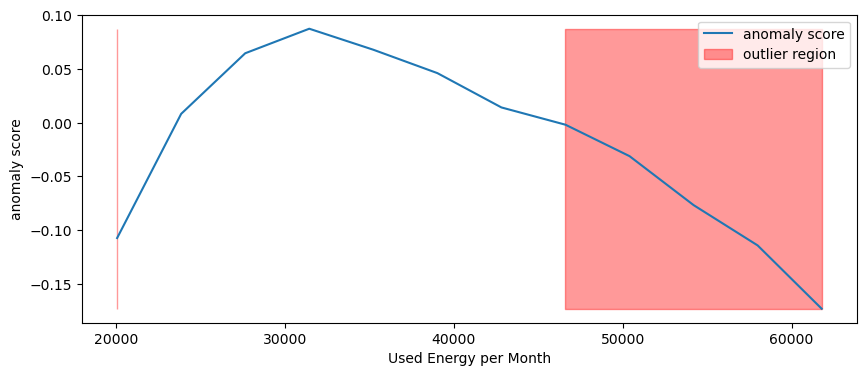

In [146]:
# Distribution of use energy per month
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Used Energy per Month')
plt.show();

#### Multivariate Anomaly Detection

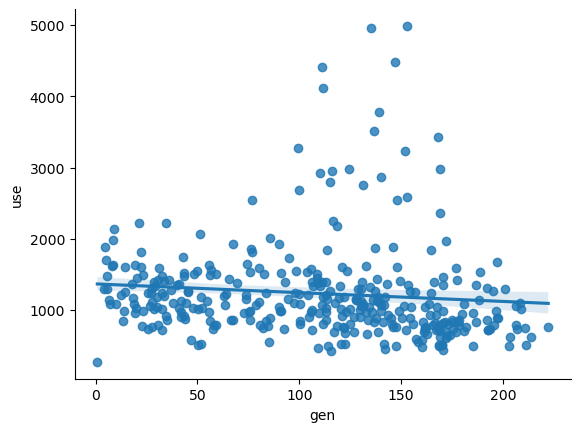

In [149]:
# Generated vs Used Energy per day 
sns.regplot(x="gen", y="use", data=energy_per_day)
sns.despine();

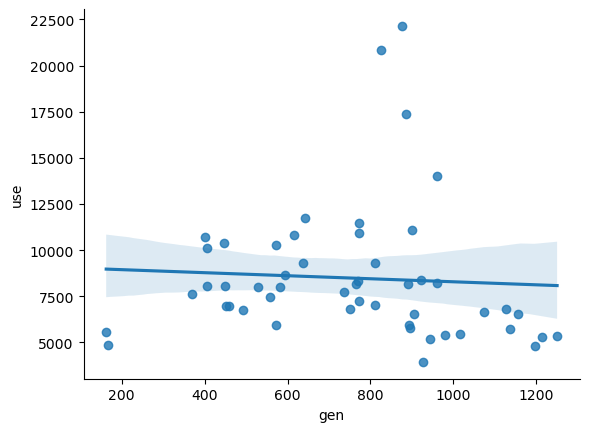

In [151]:
# Generated vs Used Energy per week 
sns.regplot(x="gen", y="use", data=energy_per_week)
sns.despine();

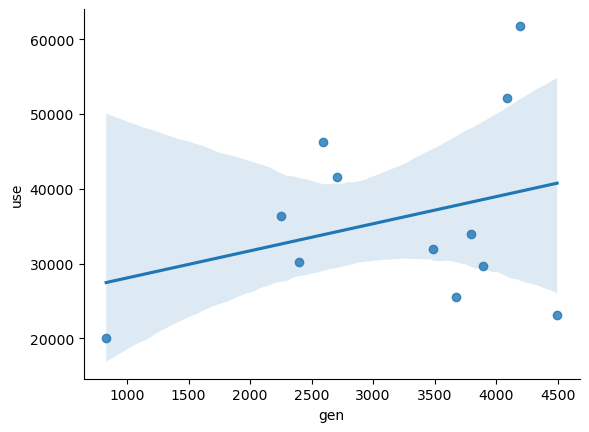

In [153]:
# Generated vs Used Energy per month 
sns.regplot(x="gen", y="use", data=energy_per_month)
sns.despine();

#### Moving Average

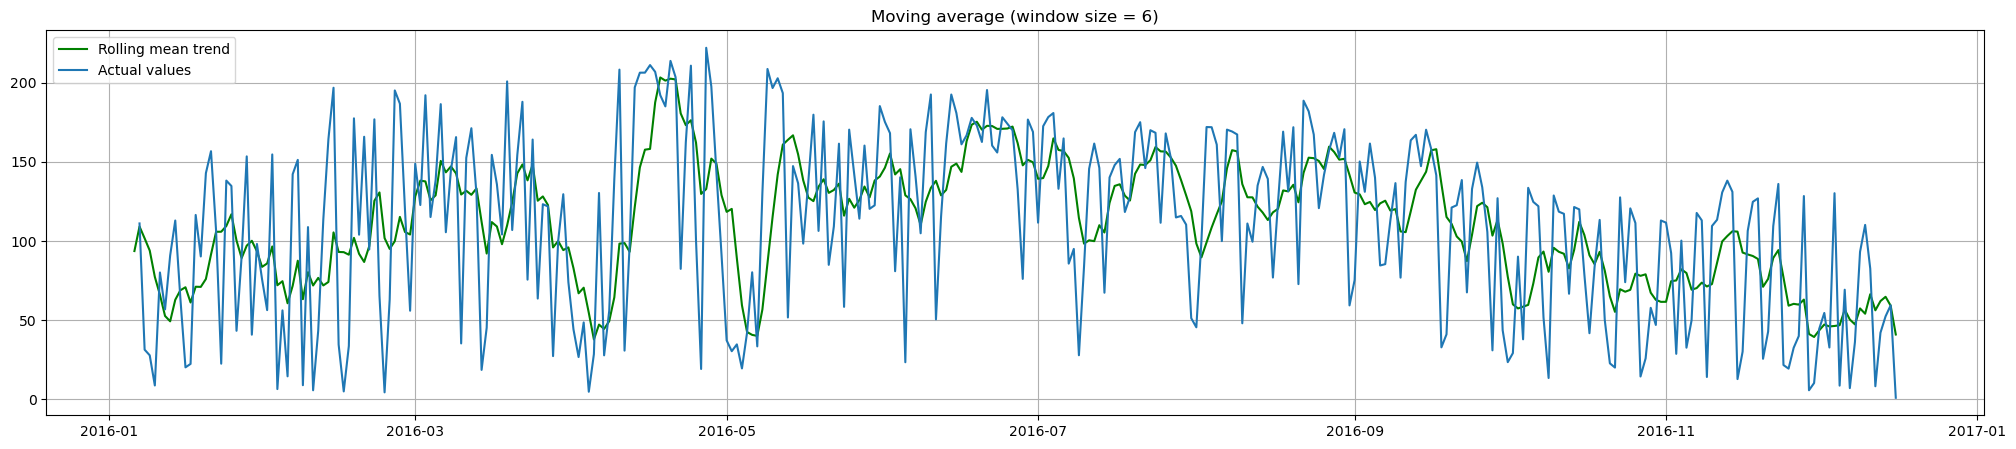

In [156]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):
  rolling_mean = series.rolling(window=window).mean()

  plt.figure(figsize=(25,5))
  plt.title("Moving average (window size = {})".format(window))
  plt.plot(rolling_mean, "g", label="Rolling mean trend")

  # Plot confidence intervals for smoothed values
  if plot_intervals:
      mae = mean_absolute_error(series[window:], rolling_mean[window:])
      deviation = np.std(series[window:] - rolling_mean[window:])
      lower_bond = rolling_mean - (mae + scale * deviation)
      upper_bond = rolling_mean + (mae + scale * deviation)
      plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
      plt.plot(lower_bond, "r--")
      
      # Having the intervals, find abnormal values
      if plot_anomalies:
          anomalies = pd.DataFrame(index=series.index, columns=series.columns)
          anomalies[seriesupper_bond] = series[series>upper_bond]
          plt.plot(anomalies, "ro", markersize=10)
      
  plt.plot(series[window:], label="Actual values")
  plt.legend(loc="upper left")
  plt.grid(True)

n_samples = 24*30 # 1 month
data = energy_per_day.filter(items=['gen'])
plotMovingAverage(data[:n_samples], window=6) # A window of 6 hours

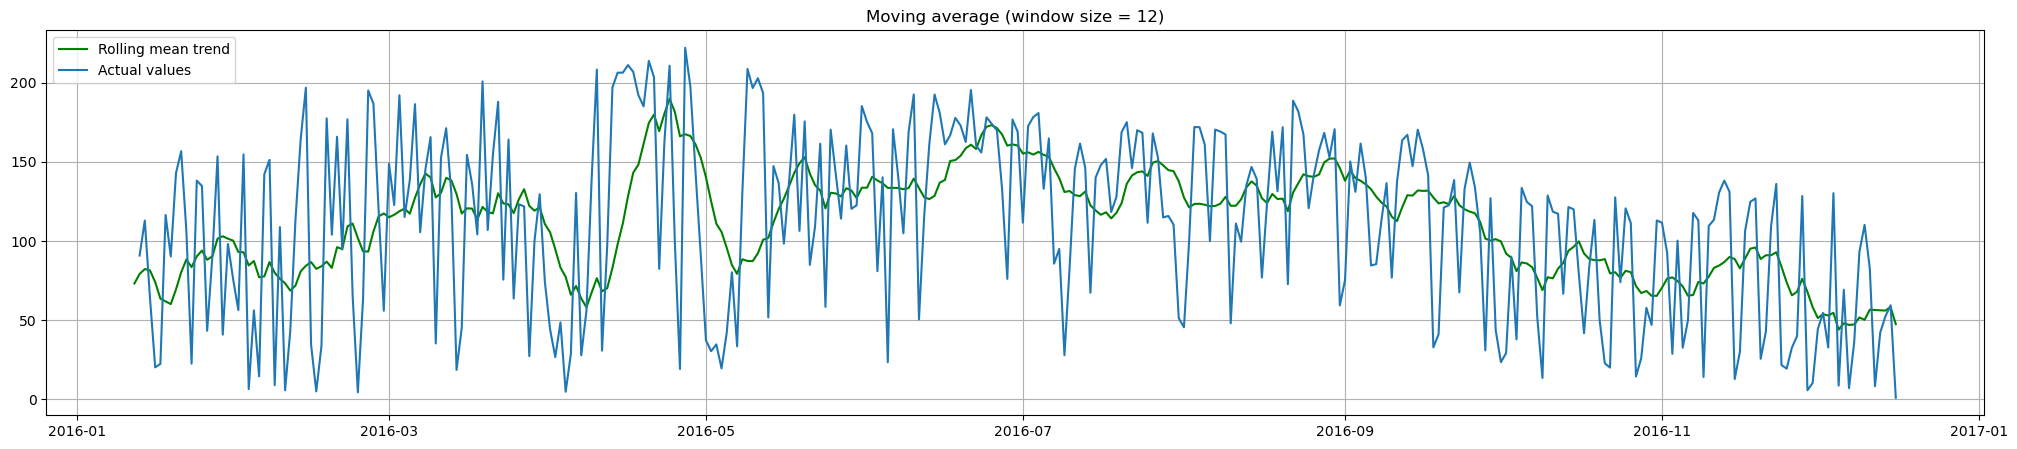

In [158]:
plotMovingAverage(data[:n_samples], window=12) # A window of 12 hours

ValueError: 'y1' is not 1-dimensional

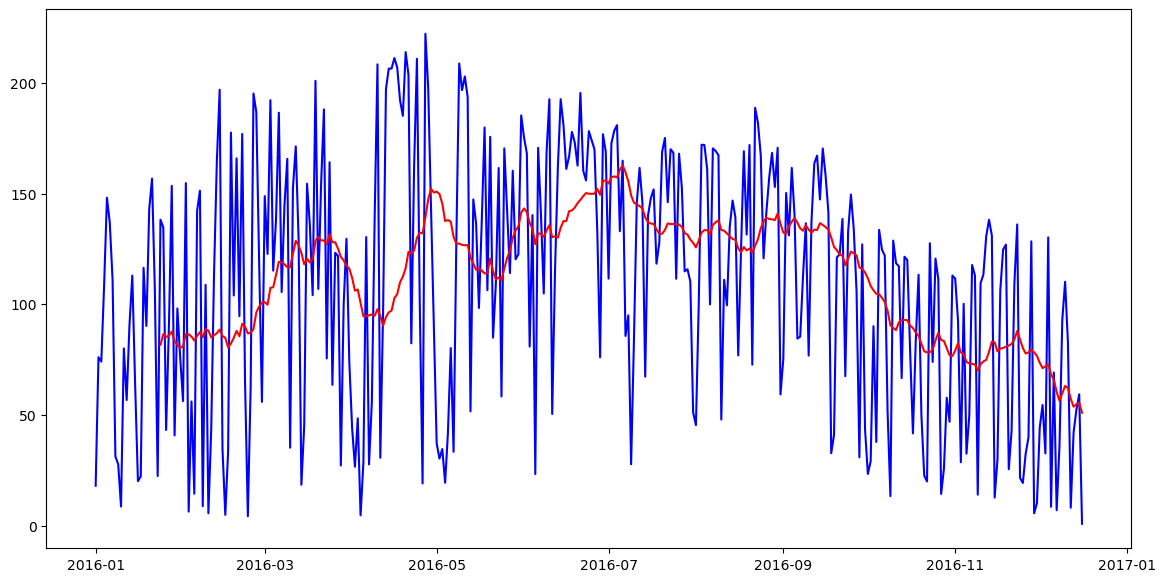

In [176]:
plotMovingAverage(data[:n_samples], window=24, plot_intervals=True, plot_anomalies=False)

ValueError: 'y1' is not 1-dimensional

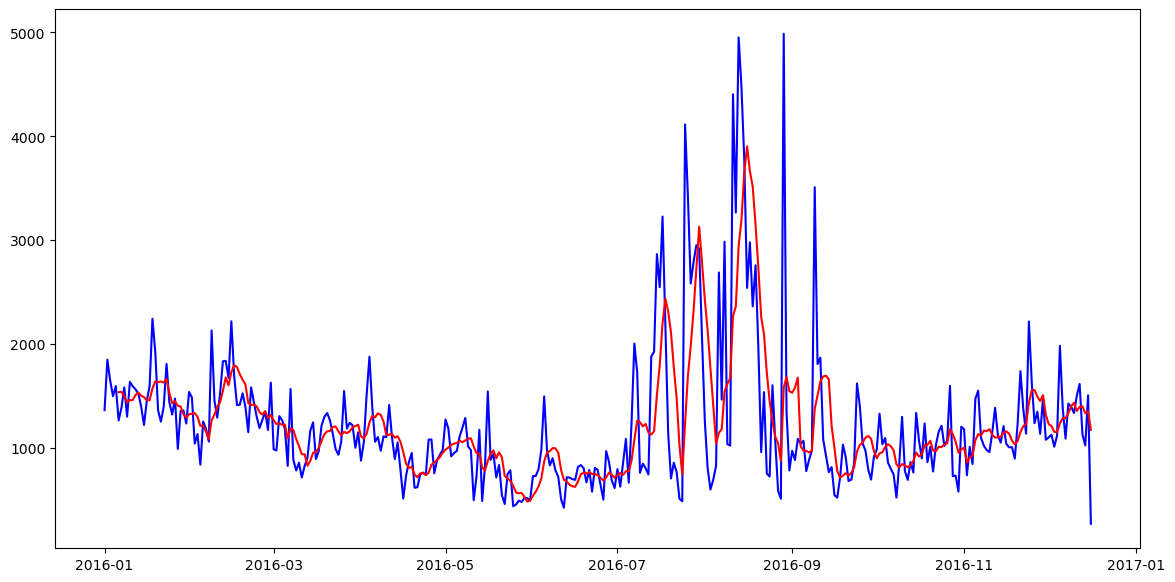

In [178]:
data = energy_per_day.filter(items=['use'])
plotMovingAverage(data[:n_samples], window=6) # A window of 6 hours

ValueError: 'y1' is not 1-dimensional

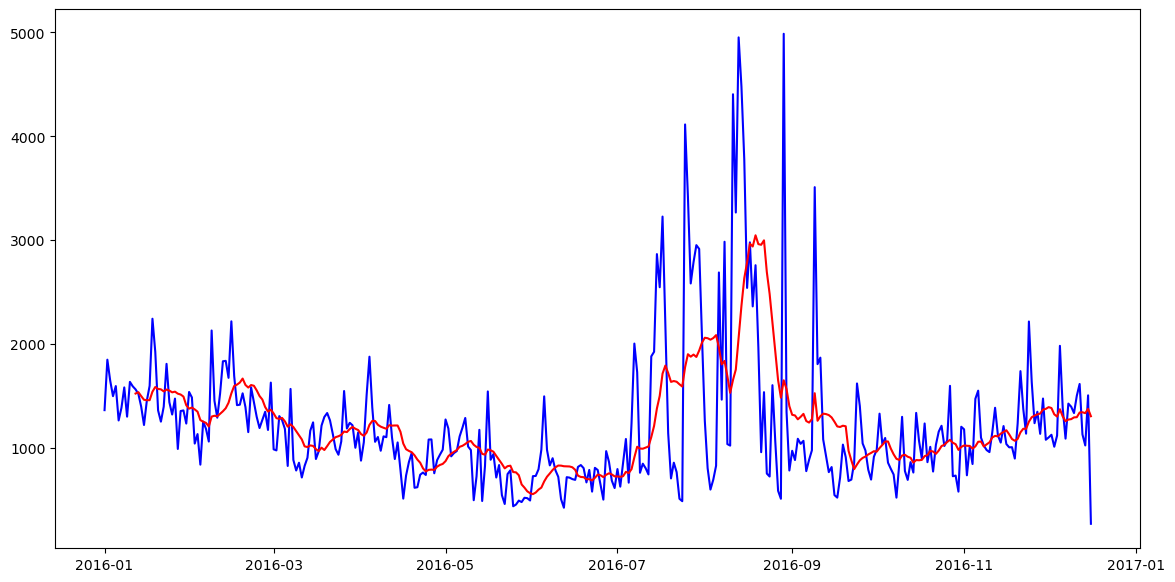

In [180]:
plotMovingAverage(data[:n_samples], window=12) # A window of 12 hours

ValueError: 'y1' is not 1-dimensional

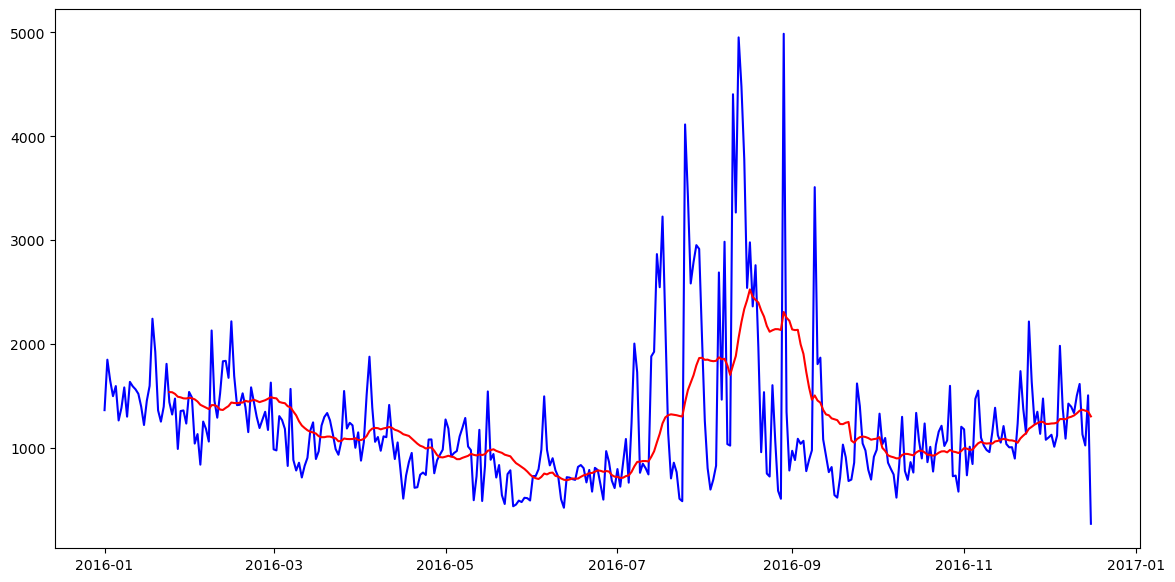

In [182]:
plotMovingAverage(data[:n_samples], window=24, plot_intervals=True, plot_anomalies=True)

### Time Series Forecasting using ARIMA model

Autocorrelation for 'use' =  0.610700982502909


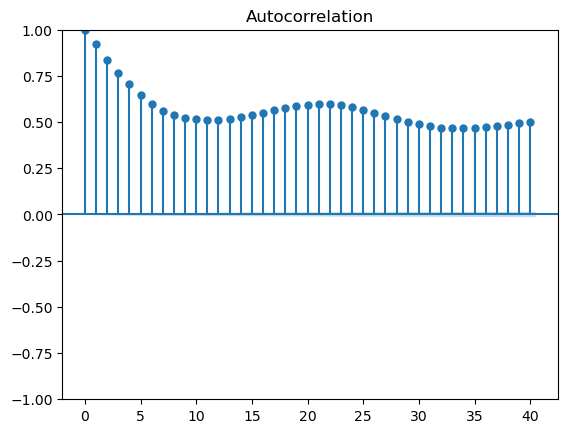

In [185]:
#Autocorrelation plot is used to find the AR parameter p of the ARIMA model
print("Autocorrelation for 'use' = ", energy_per_day['use'].autocorr())
fig= plot_acf(energy_data['use'], lags=40)
plt.show()

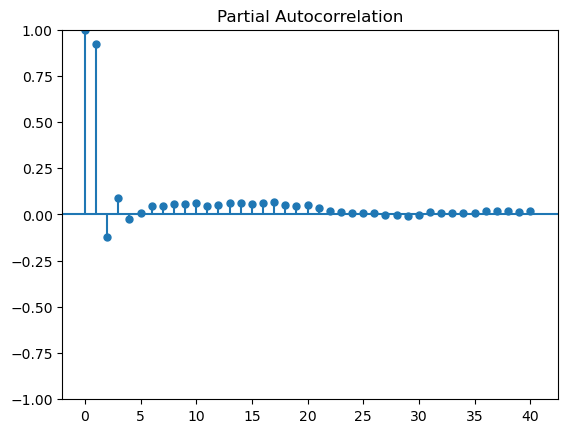

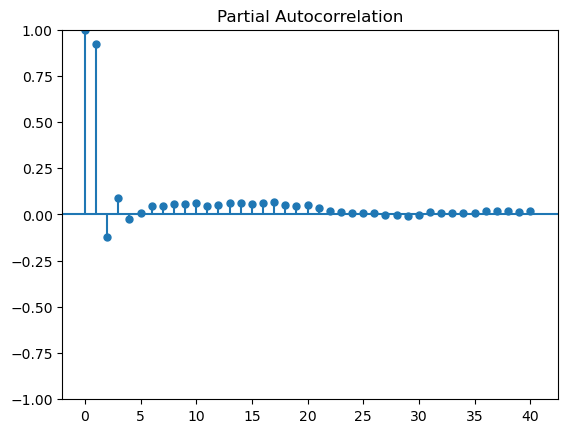

In [187]:
plot_pacf(energy_data['use'], lags=40)

### Our analysis of the Partial Autocorrelation Function (PACF) plot reveals an interesting characteristic of the time series data. The plot shows a rapid decline in correlation values, with significant drops occurring after the first 5 lags.

#### This quick cut-off in the PACF plot provides valuable insights into the underlying structure of our data:

#### 1. Short-term dependencies: It suggests that the direct influence of past observations on the current value is primarily limited to the most recent 5 time periods. For instance, in hourly data, this would mean that the energy usage at any given hour is most strongly related to the usage in the previous 5 hours.

#### 2. Model order indication: This pattern is particularly useful for determining the order of an autoregressive (AR) model. The cut-off at lag 5 implies that an AR(5) model might be appropriate for forecasting this time series.

#### 3. Finite memory process: The rapid decline indicates that the time series has a relatively short "memory." After 5 lags, the direct effect of past values becomes negligible.

#### 4. Simplified forecasting: This characteristic can lead to more streamlined and potentially more accurate short-term forecasting models, as they need to consider only a limited number of past values.

#### Understanding this PACF behavior can greatly aid in model selection and specification for time series analysis and forecasting. It suggests that while there are significant short-term correlations, long-term trends might be better captured by other components of the model or additional variables.

#### However, it's important to note that while the PACF cuts off quickly, other patterns or long-term trends might still exist in the data that are not captured by this specific analysis.

In [17]:
#We initially trained the model on a resampled dataset with 20,000 records but since it takes a
#lot of time in the order of several hours depending on the p,d,q combinations of ARIMA we have 
#resampled the data with just 2000 records for the convenience of reducing the time of execution 

import pandas as pd


home_df = pd.read_csv('/Users/rishi/Downloads/HomeC.csv', low_memory=False)

# Display the first few rows to verify data loading
print(home_df.head())

         time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0  1451624400  0.932833  0.003483            0.932833         0.000033   
1  1451624401  0.934333  0.003467            0.934333         0.000000   
2  1451624402  0.931817  0.003467            0.931817         0.000017   
3  1451624403  1.022050  0.003483            1.022050         0.000017   
4  1451624404  1.139400  0.003467            1.139400         0.000133   

   Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0        0.020700        0.061917          0.442633     0.124150   
1        0.020717        0.063817          0.444067     0.124000   
2        0.020700        0.062317          0.446067     0.123533   
3        0.106900        0.068517          0.446583     0.123133   
4        0.236933        0.063983          0.446533     0.122850   

   Wine cellar [kW]  ...  visibility  summary  apparentTemperature  pressure  \
0          0.006983  ...        10.0    Clear                29.26

In [19]:
# Sample the data
home_arima_df = home_df.sample(n=2000, random_state=42)

# Display the first few rows of the sampled data and its shape
print(home_arima_df.head())
print(home_arima_df.shape)


              time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
391132  1452015532  0.418867  0.037933            0.418867         0.000000   
454553  1452078953  0.586400  0.006783            0.586400         0.000000   
241362  1451865762  0.231417  0.302250            0.231417         0.000017   
413167  1452037567  0.609450  0.004200            0.609450         0.000000   
58184   1451682584  0.763600  0.001633            0.763600         0.000217   

        Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
391132        0.020533        0.070583          0.111450     0.005467   
454553        0.020783        0.062750          0.039717     0.120683   
241362        0.019917        0.066883          0.128783     0.136667   
413167        0.020600        0.082950          0.137767     0.136000   
58184         0.473100        0.064733          0.040367     0.004700   

        Wine cellar [kW]  ...  visibility        summary  apparentTemperature  \
39113

In [21]:
# Check data types of the dataframe
print(home_arima_df.dtypes)


time                    object
use [kW]               float64
gen [kW]               float64
House overall [kW]     float64
Dishwasher [kW]        float64
Furnace 1 [kW]         float64
Furnace 2 [kW]         float64
Home office [kW]       float64
Fridge [kW]            float64
Wine cellar [kW]       float64
Garage door [kW]       float64
Kitchen 12 [kW]        float64
Kitchen 14 [kW]        float64
Kitchen 38 [kW]        float64
Barn [kW]              float64
Well [kW]              float64
Microwave [kW]         float64
Living room [kW]       float64
Solar [kW]             float64
temperature            float64
icon                    object
humidity               float64
visibility             float64
summary                 object
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover              object
windBearing            float64
precipIntensity        float64
dewPoint               float64
precipProbability      float64
dtype: o

#### Training an ARIMA model

In [26]:
# Check the columns in the DataFrame
print(home_arima_df.columns)

# Display the first few rows to verify data
print(home_arima_df.head())


Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')
              time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
391132  1452015532  0.418867  0.037933            0.418867         0.000000   
454553  1452078953  0.586400  0.006783            0.586400         0.000000   
241362  1451865762  0.231417  0.302250            0.231417         0.000017   
413167  1452037567  0.609450  0.004200            0.609450         0.000000   
58184   1451682584

predicted=0.651051, expected=0.039317
predicted=0.563942, expected=0.634967
predicted=0.571888, expected=6.427533
predicted=0.824968, expected=0.475933
predicted=0.762137, expected=0.385533
predicted=0.822201, expected=0.319367
predicted=0.982791, expected=1.908317
predicted=0.893871, expected=0.392983
predicted=1.255834, expected=0.685633
predicted=1.239263, expected=0.675133
predicted=0.960629, expected=0.286000
predicted=0.839424, expected=1.112600
predicted=1.128665, expected=1.834317
predicted=0.991484, expected=0.277683
predicted=1.258333, expected=1.092067
predicted=0.875922, expected=0.055333
predicted=1.214619, expected=1.180833
predicted=1.205794, expected=0.292733
predicted=1.146257, expected=0.194100
predicted=0.677348, expected=0.201500
predicted=0.688907, expected=0.330500
predicted=0.681324, expected=0.010883
predicted=0.642647, expected=1.691917
predicted=0.648867, expected=0.884483
predicted=0.697017, expected=0.414650
predicted=0.562294, expected=0.191650
predicted=0.

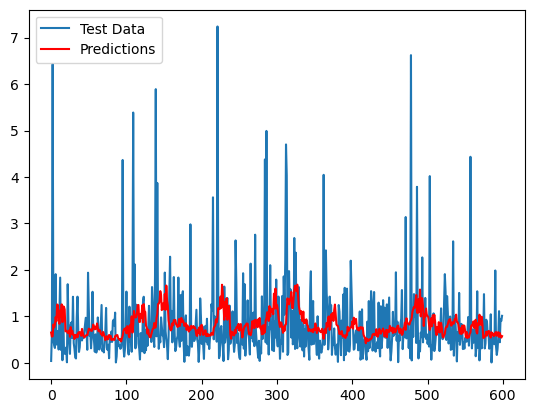

In [105]:
from statsmodels.tsa.arima.model import ARIMA  
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

X = home_arima_df['use [kW]'].values 
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
start_time = time.time()

for t in range(len(test)):
    model = ARIMA(history, order=(8,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0] 
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
end_time = time.time()
time_taken = end_time - start_time

print('Time taken to train the model in seconds= ', time_taken)
print('Test MSE: %.3f' % error)

# Plot the results
plt.plot(test, label='Test Data')
plt.plot(predictions, color='red', label='Predictions')
plt.legend()
plt.show()


#### Residual Analysis of the ARIMA model

<Axes: >

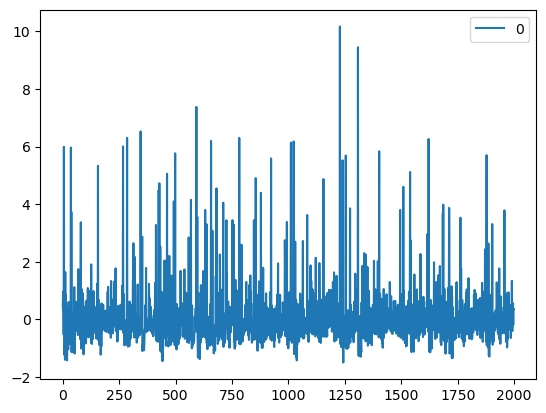

In [108]:
from pandas import DataFrame
#We get the information if the model is accurate from the residual analysis
residuals= DataFrame(model_fit.resid)
residuals.plot()

In [110]:
residuals.describe()

0
count  1999.000000
mean     -0.001757
std       1.046672
min      -1.501605
25%      -0.507915
50%      -0.228613
75%       0.163412
max      10.171688